## COMPETITION KAAGLE  


 Prédire les performances des élèves lors d'un apprentissage basé sur le jeu en temps réel  .

# 1. Définir un objectif mesurable : 

* Objectif : 

           Prédire les performances des élèves 
           lors d'un apprentissage basé sur le jeu en temps réel 
            en fonction des données disponibles sur KAAGLE .

* Metrique :
            F1 = 60% et Recall = 75%

            Rappel : F1 est le rapport entre la précision et le recall .

            le recall permet de réduire au maximum les faux négatifs .
 
            la précision permet de réduire au maximum les faux positifs .


# EXPLORATORY DATA ANALYSIS 


Objectif:

* Mieux comprendre nos données 
* Etablir une stratégie de modélisation 

#   Analyse de la forme : 

* Identification de la target : correct 
Classes légèrement équilibrés  (1  un peu plus de 63 %  , 0 un peu plus de 36 %)

* Nombre de lignes et de colonnes  : 89392050 ,	21


* Types de variables  : qualitatives : 7   , quantitatives : 13 

 








 

* Analyse des valeurs manquantes:
  - Des NaN (Deux variables  hover_duration et page > 90% de NaN)
  - Deux grands groupes de données  (0% de Nans   et  un groupe 0.09447)
  - Un groupe de  ( deux variables text et text_fqid avec 0.65262 de Nans)
  - Une variable fqid avec 0.31617





# Analyse du fond :

* Visualisation de la target (Histogramme / Boxplot)
* Comprehension des différentes variables (Internet -- Kaggle discusion )

* Visualisation de la target (Histogramme / Boxplot)
 qualques variables continues standardisées , skewed (asymétriques)  suivant une loi normale  
  ** Variable qualitative :elles ne sont pas  binaire , ce sont des variables qui possèdent plusieurs categories et la variable texte en possède le plus (énorme)
  ** Relation Variables / Target **
  - target/Medium_na : les variables text et text_fqid semblent liés a la performance des élèves 
  - target/Little_na : Les room_coordonnées et les screens_coordonnées x , y  semblent etres liés a la performance des élèves 
  - target/zero_na : les variables music , hq , level_group semblent  avoir un lien avec la performance des élèves (Hypothèse à tester)
* Visualisation des relations variables -target(Histogramme/Boxplot) 


* Identification des outliers 


Conclusion :

            - Une feature engineering avec les variables
              -- room_coord , screen_coord peuvent  apporter des informations supplémentaires pour nous permettre de répondre à la question
              -- Les variables text  et  text_fqid peuvent  également  nous apporter beaucoup d'informations puisqu'ils ont  plusieurs categories à étudier 
              -- Enfin les variables music , hq , level_group sont très liés à la performance 

In [2]:
#pip install polars 
#pip install pyarrow 


In [3]:
import polars as pl 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns   
import pyarrow

In [4]:
import polars as pl 

print(pl.__version__)

0.17.2


In [5]:
reader_features = pl.read_csv_batched(
    "./data/predict_student_game_performance_train.csv"
)  
features_data = reader_features.next_batches(100)  


features_data = pl.concat(features_data)


In [6]:
reader_labels = pl.read_csv_batched(
    "./data/predict_student_game_performance_train_labels.csv"
)  
target_data = reader_labels.next_batches(100) 
target_data = pl.concat(target_data)
# extraire les premiers 17 caractères de la colonne 'session_id'

target_data = target_data.with_columns(pl.col("session_id").str.split("_").apply(lambda x: x[0]))

target_data = target_data.with_columns(pl.col("session_id").cast(pl.Int64))







  




In [7]:
data = features_data.join(target_data , on = "session_id" , how="inner")





In [8]:
data=data.to_pandas()

df = data.copy()
df = df.head(600000)

In [9]:
df.shape # Nombre de lignes , Nombre de colonnes : dimensionalite du dataset

(600000, 21)

In [10]:
df.dtypes.value_counts()

int64      8
object     8
float64    5
Name: count, dtype: int64

<Axes: ylabel='count'>

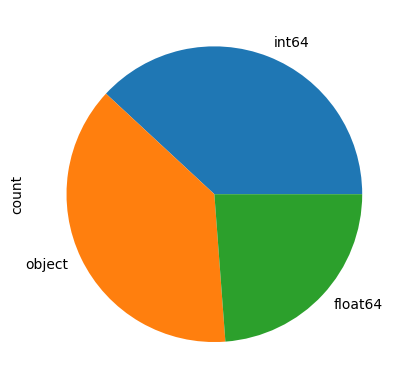

In [11]:
df.dtypes.value_counts().plot.pie()


 ### Analyse des NaN

<Axes: >

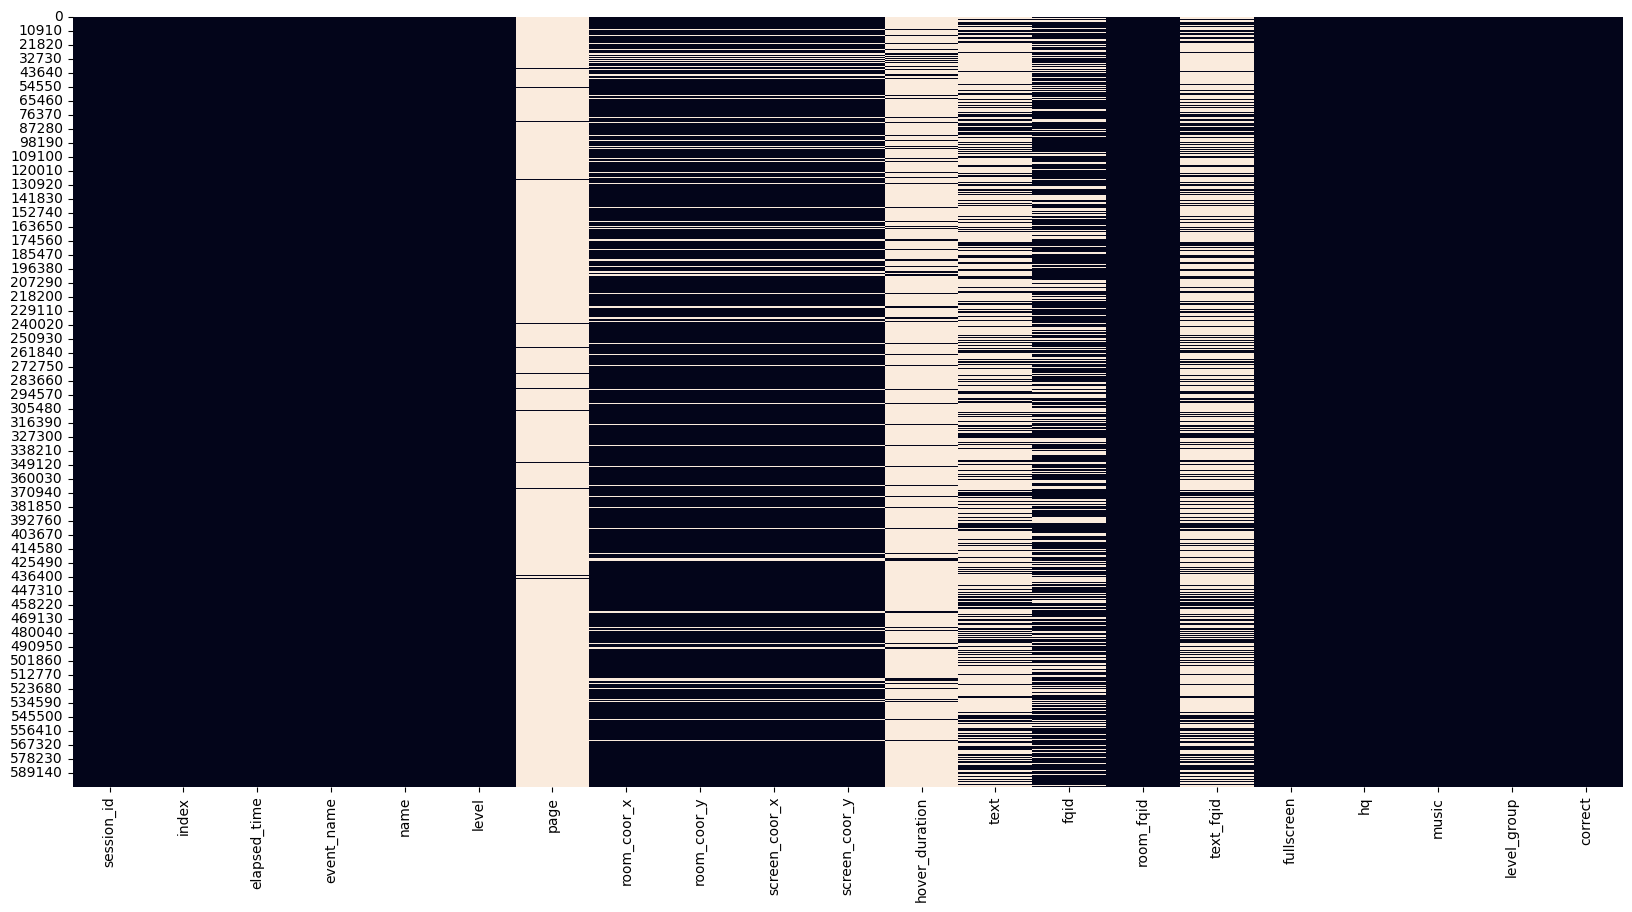

In [12]:
plt.figure(figsize = (20,10))
sns.heatmap(df.isna() , cbar=False)

## Mesurer le pourcentage de valeurs manquantes dans notre dataframe

In [13]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)


# 98 % des variable page est manquante c'est dingue 




page              0.97864
hover_duration    0.90811
text_fqid         0.65262
text              0.65262
fqid              0.31617
screen_coor_y     0.09447
room_coor_x       0.09447
room_coor_y       0.09447
screen_coor_x     0.09447
room_fqid         0.00000
level_group       0.00000
music             0.00000
hq                0.00000
fullscreen        0.00000
session_id        0.00000
index             0.00000
level             0.00000
name              0.00000
event_name        0.00000
elapsed_time      0.00000
correct           0.00000
dtype: float64

# Analyse du fond 

1. Visualisation intiale - Elimination des colonnes inules 

In [14]:

df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]

df.head()

session_id  index  elapsed_time      event_name   name  level   
0  20090312431273200      0             0  cutscene_click  basic      0  \
1  20090312431273200      0             0  cutscene_click  basic      0   
2  20090312431273200      0             0  cutscene_click  basic      0   
3  20090312431273200      0             0  cutscene_click  basic      0   
4  20090312431273200      0             0  cutscene_click  basic      0   

   room_coor_x  room_coor_y  screen_coor_x  screen_coor_y       text   fqid   
0  -413.991405  -159.314686          380.0          494.0  undefined  intro  \
1  -413.991405  -159.314686          380.0          494.0  undefined  intro   
2  -413.991405  -159.314686          380.0          494.0  undefined  intro   
3  -413.991405  -159.314686          380.0          494.0  undefined  intro   
4  -413.991405  -159.314686          380.0          494.0  undefined  intro   

                        room_fqid                             text_fqid   
0  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro  \
1  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro   
2  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro   
3  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro   
4  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro   

   fullscreen  hq  music level_group  correct  
0           0   0      1         0-4        1  
1           0   0      1         0-4        1  
2           0   0      1         0-4        1  
3           0   0      1         0-4        1  
4           0   0      1         0-4        1

<Axes: >

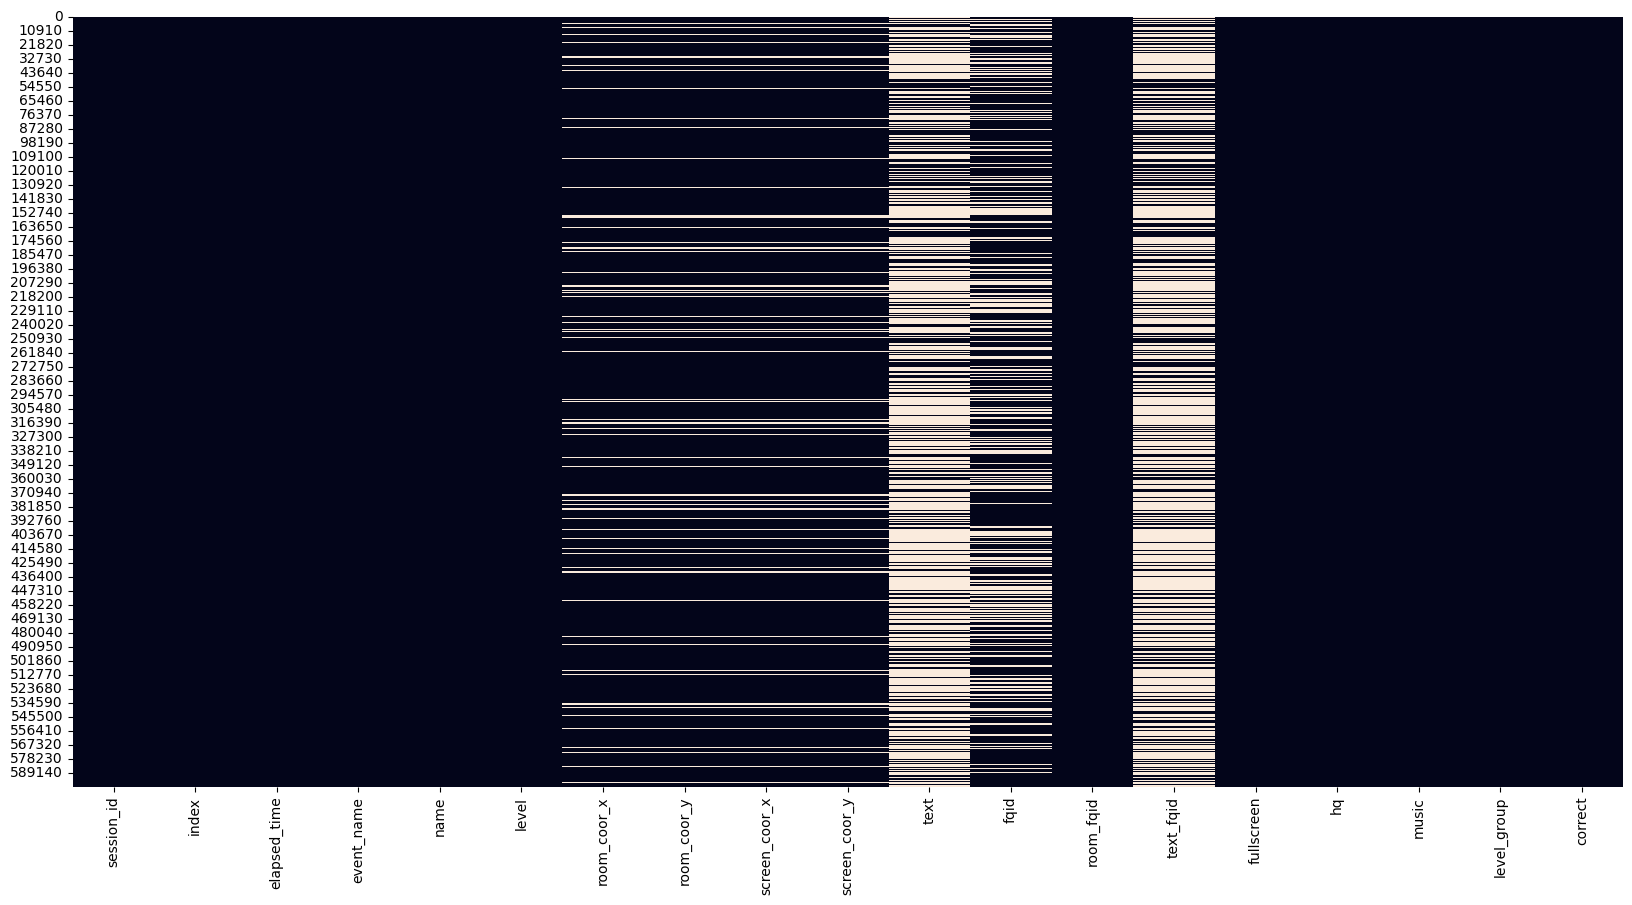

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(df.isna() , cbar=False)

In [16]:
df = df.drop('index' , axis=1)
#df = df.drop('session_id' , axis=1)
df.head()

session_id  elapsed_time      event_name   name  level  room_coor_x   
0  20090312431273200             0  cutscene_click  basic      0  -413.991405  \
1  20090312431273200             0  cutscene_click  basic      0  -413.991405   
2  20090312431273200             0  cutscene_click  basic      0  -413.991405   
3  20090312431273200             0  cutscene_click  basic      0  -413.991405   
4  20090312431273200             0  cutscene_click  basic      0  -413.991405   

   room_coor_y  screen_coor_x  screen_coor_y       text   fqid   
0  -159.314686          380.0          494.0  undefined  intro  \
1  -159.314686          380.0          494.0  undefined  intro   
2  -159.314686          380.0          494.0  undefined  intro   
3  -159.314686          380.0          494.0  undefined  intro   
4  -159.314686          380.0          494.0  undefined  intro   

                        room_fqid                             text_fqid   
0  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro  \
1  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro   
2  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro   
3  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro   
4  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro   

   fullscreen  hq  music level_group  correct  
0           0   0      1         0-4        1  
1           0   0      1         0-4        1  
2           0   0      1         0-4        1  
3           0   0      1         0-4        1  
4           0   0      1         0-4        1

## Examen de la colonne target 

In [17]:
df['correct'].value_counts(normalize =True)

correct
1    0.635163
0    0.364837
Name: proportion, dtype: float64

## Histogrammes des variables continues 

<Figure size 640x480 with 0 Axes>

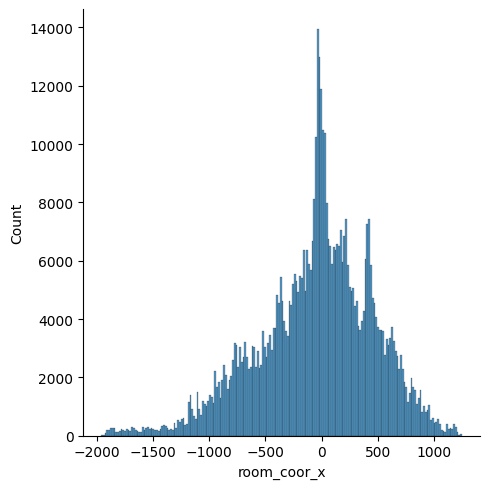

<Figure size 640x480 with 0 Axes>

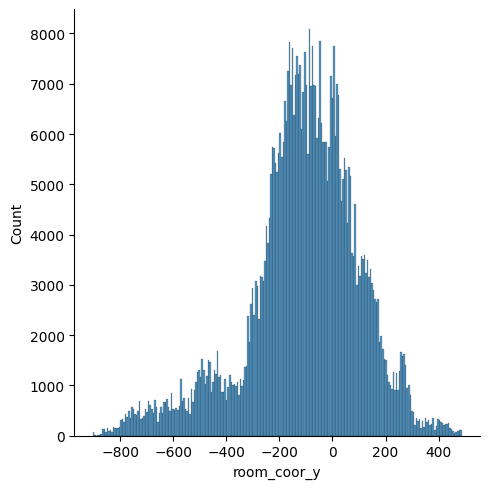

<Figure size 640x480 with 0 Axes>

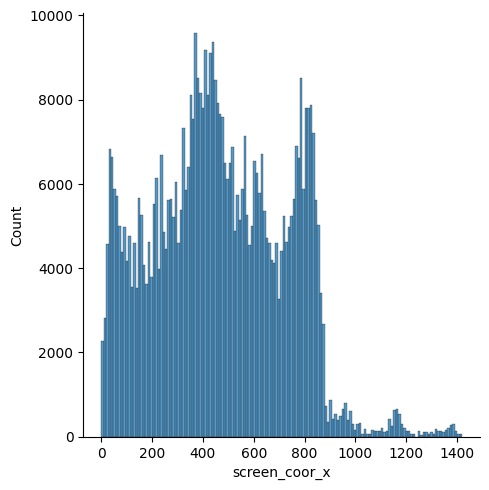

<Figure size 640x480 with 0 Axes>

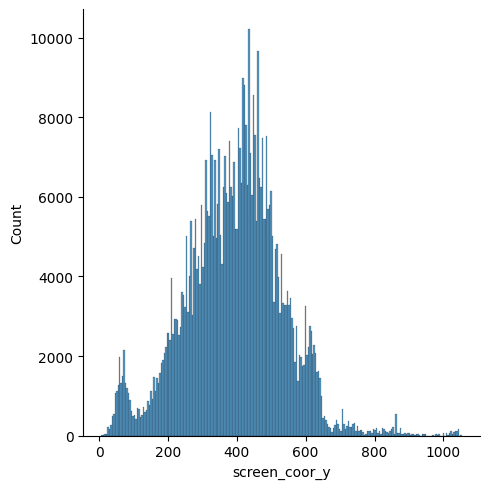

In [18]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col])
    #print(col)

In [19]:
df.head()

session_id  elapsed_time      event_name   name  level  room_coor_x   
0  20090312431273200             0  cutscene_click  basic      0  -413.991405  \
1  20090312431273200             0  cutscene_click  basic      0  -413.991405   
2  20090312431273200             0  cutscene_click  basic      0  -413.991405   
3  20090312431273200             0  cutscene_click  basic      0  -413.991405   
4  20090312431273200             0  cutscene_click  basic      0  -413.991405   

   room_coor_y  screen_coor_x  screen_coor_y       text   fqid   
0  -159.314686          380.0          494.0  undefined  intro  \
1  -159.314686          380.0          494.0  undefined  intro   
2  -159.314686          380.0          494.0  undefined  intro   
3  -159.314686          380.0          494.0  undefined  intro   
4  -159.314686          380.0          494.0  undefined  intro   

                        room_fqid                             text_fqid   
0  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro  \
1  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro   
2  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro   
3  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro   
4  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro   

   fullscreen  hq  music level_group  correct  
0           0   0      1         0-4        1  
1           0   0      1         0-4        1  
2           0   0      1         0-4        1  
3           0   0      1         0-4        1  
4           0   0      1         0-4        1

<Figure size 640x480 with 0 Axes>

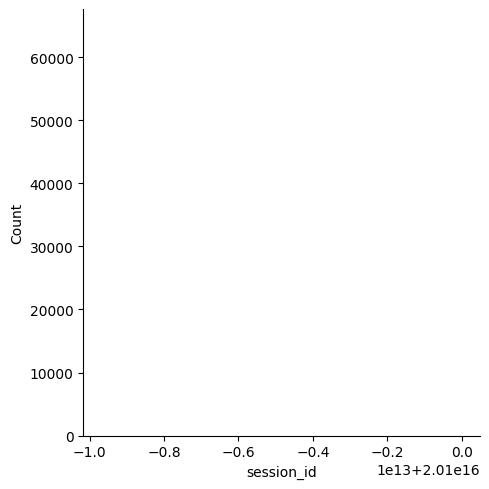

<Figure size 640x480 with 0 Axes>

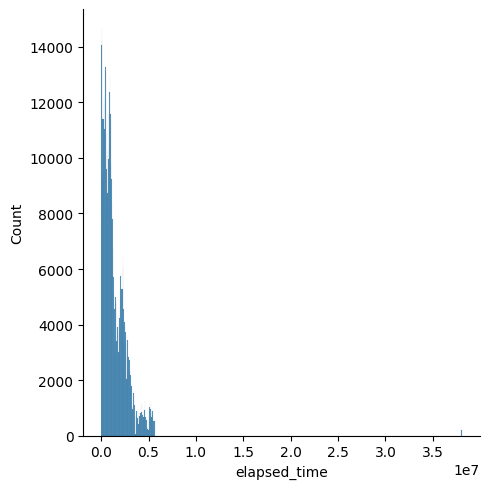

<Figure size 640x480 with 0 Axes>

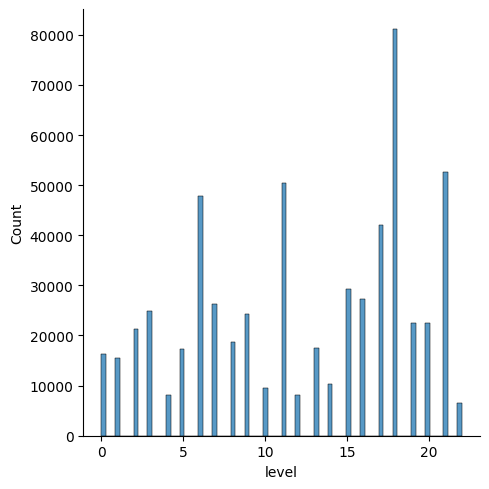

<Figure size 640x480 with 0 Axes>

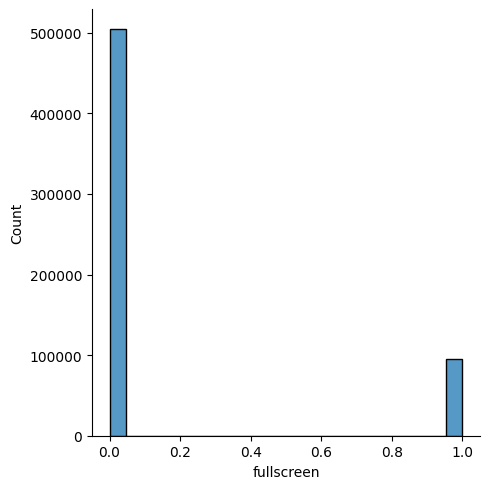

<Figure size 640x480 with 0 Axes>

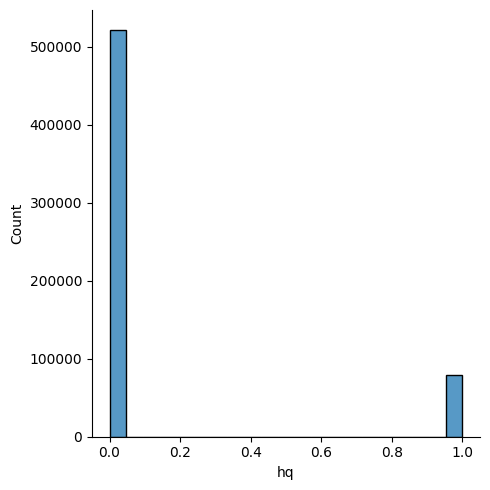

<Figure size 640x480 with 0 Axes>

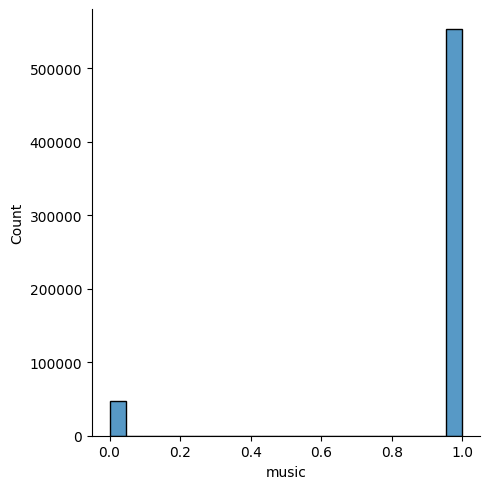

<Figure size 640x480 with 0 Axes>

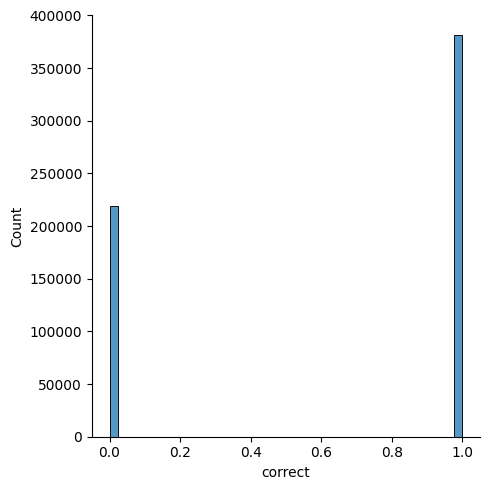

In [20]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.displot(df[col])

## Variables qualitatives 

##### 1. Différentes categories qu'il y'a dans chaque variable 


In [21]:
for col in df.select_dtypes('object'):

  print(f'{col :-<50} {df[col].unique()}')
# 1. Différentes categories qu'il y'a dans chaque variable 


event_name---------------------------------------- ['cutscene_click' 'person_click' 'navigate_click' 'observation_click'
 'notification_click' 'object_click' 'object_hover' 'map_hover'
 'map_click' 'checkpoint' 'notebook_click']
name---------------------------------------------- ['basic' 'undefined' 'close' 'open' 'prev' 'next']
text---------------------------------------------- ['undefined' 'Whatcha doing over there, Jo?' 'Just talking to Teddy.'
 'I gotta run to my meeting!' 'Can I come, Gramps?'
 'Sure thing, Jo. Grab your notebook and come upstairs!'
 'See you later, Teddy.' "I get to go to Gramps's meeting!"
 'Now where did I put my notebook?' '\\u00f0\\u0178\\u02dc\\u00b4' None
 'I love these photos of me and Teddy!' 'Found it!'
 'Gramps is in trouble for losing papers?' "This can't be right!"
 'Gramps is a great historian!' "Hmm. Button's still not working."
 "Let's get started. The Wisconsin Wonders exhibit opens tomorrow!"
 'Who wants to investigate the shirt artifact?'
 "Not 

##### 2. Counter le nombre de valeurs qu'il y'a dans chaque categorie

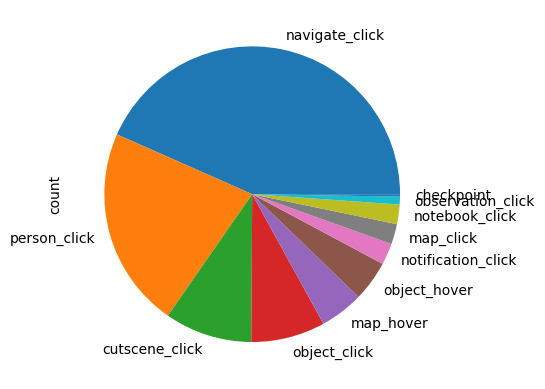

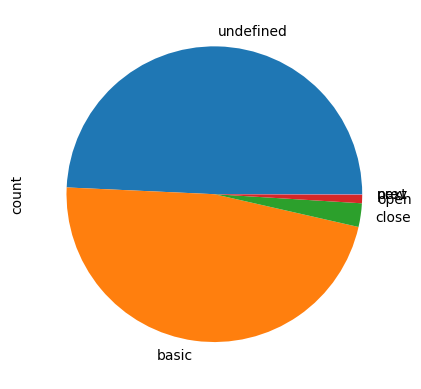

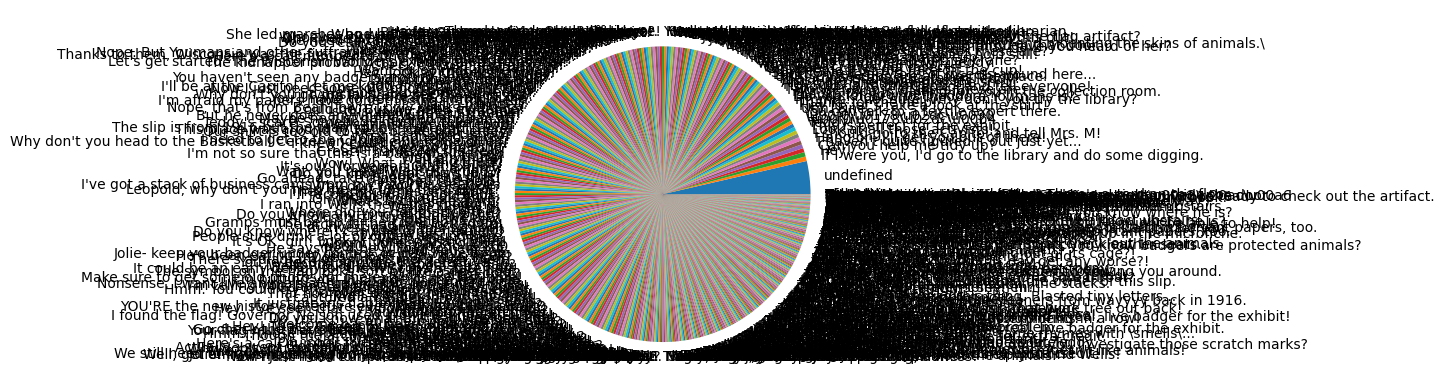

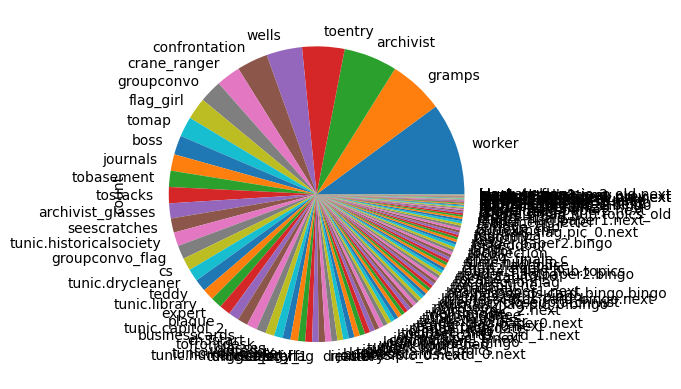

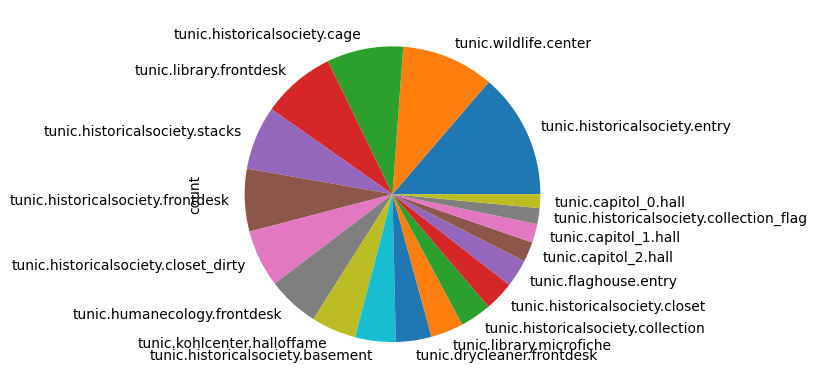

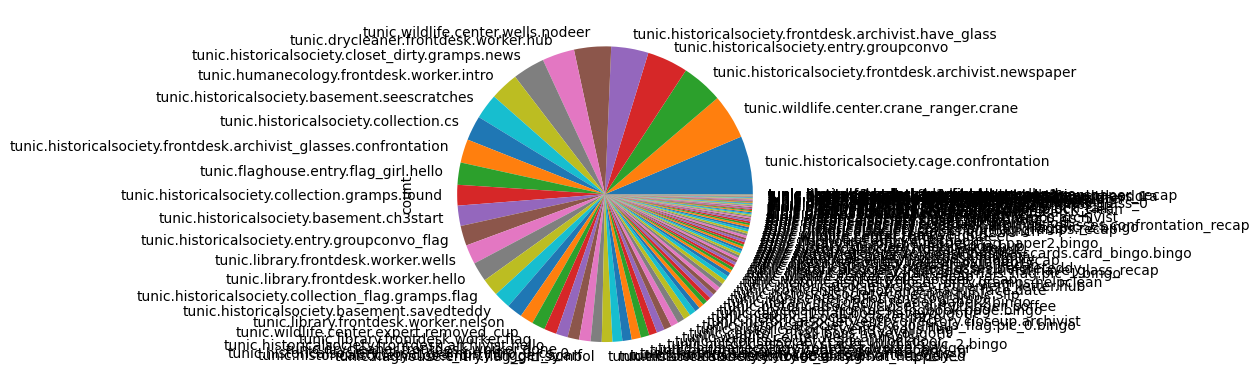

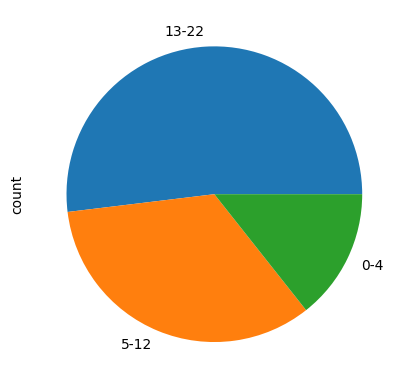

In [22]:
for col in df.select_dtypes('object'):
  plt.figure()
  df[col].value_counts().plot.pie()



  # 2. Counter le nombre de valeurs qu'il y'a dans chaque categorie

# Relation Target / Variables 

### Création des sous-ensembles reussites et échecs

In [23]:
reussite_df = df[df['correct'] == 1]


# Créer un dictionnaire de correspondance
mapping = {1: 'succès', 0: 'échec'}

# Utiliser la méthode map() pour convertir les valeurs
reussite_df['correct'] = reussite_df['correct'].astype('object').map(mapping)


reussite_df.head()


/var/folders/20/j5yjkwj15ts7__y_rbh9222h0000gn/T/ipykernel_41739/2546378370.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reussite_df['correct'] = reussite_df['correct'].astype('object').map(mapping)


session_id  elapsed_time      event_name   name  level  room_coor_x   
0  20090312431273200             0  cutscene_click  basic      0  -413.991405  \
1  20090312431273200             0  cutscene_click  basic      0  -413.991405   
2  20090312431273200             0  cutscene_click  basic      0  -413.991405   
3  20090312431273200             0  cutscene_click  basic      0  -413.991405   
4  20090312431273200             0  cutscene_click  basic      0  -413.991405   

   room_coor_y  screen_coor_x  screen_coor_y       text   fqid   
0  -159.314686          380.0          494.0  undefined  intro  \
1  -159.314686          380.0          494.0  undefined  intro   
2  -159.314686          380.0          494.0  undefined  intro   
3  -159.314686          380.0          494.0  undefined  intro   
4  -159.314686          380.0          494.0  undefined  intro   

                        room_fqid                             text_fqid   
0  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro  \
1  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro   
2  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro   
3  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro   
4  tunic.historicalsociety.closet  tunic.historicalsociety.closet.intro   

   fullscreen  hq  music level_group correct  
0           0   0      1         0-4  succès  
1           0   0      1         0-4  succès  
2           0   0      1         0-4  succès  
3           0   0      1         0-4  succès  
4           0   0      1         0-4  succès

In [24]:
echec_df = df[df['correct']==0]

# Créer un dictionnaire de correspondance
mapping = {1 : 'succès', 0 : 'échec'}

# Utiliser la méthode map() pour convertir les valeurs
echec_df['correct'] = echec_df['correct'].astype('object').map(mapping)


echec_df.head()

/var/folders/20/j5yjkwj15ts7__y_rbh9222h0000gn/T/ipykernel_41739/2850796139.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  echec_df['correct'] = echec_df['correct'].astype('object').map(mapping)


session_id  elapsed_time      event_name   name  level   
12  20090312431273200             0  cutscene_click  basic      0  \
15  20090312431273200             0  cutscene_click  basic      0   
30  20090312431273200          1323    person_click  basic      0   
33  20090312431273200          1323    person_click  basic      0   
48  20090312431273200           831    person_click  basic      0   

    room_coor_x  room_coor_y  screen_coor_x  screen_coor_y   
12  -413.991405  -159.314686          380.0          494.0  \
15  -413.991405  -159.314686          380.0          494.0   
30  -413.991405  -159.314686          380.0          494.0   
33  -413.991405  -159.314686          380.0          494.0   
48  -413.991405  -159.314686          380.0          494.0   

                             text    fqid                       room_fqid   
12                      undefined   intro  tunic.historicalsociety.closet  \
15                      undefined   intro  tunic.historicalsociety.closet   
30  Whatcha doing over there, Jo?  gramps  tunic.historicalsociety.closet   
33  Whatcha doing over there, Jo?  gramps  tunic.historicalsociety.closet   
48         Just talking to Teddy.  gramps  tunic.historicalsociety.closet   

                                            text_fqid  fullscreen  hq  music   
12               tunic.historicalsociety.closet.intro           0   0      1  \
15               tunic.historicalsociety.closet.intro           0   0      1   
30  tunic.historicalsociety.closet.gramps.intro_0_...           0   0      1   
33  tunic.historicalsociety.closet.gramps.intro_0_...           0   0      1   
48  tunic.historicalsociety.closet.gramps.intro_0_...           0   0      1   

   level_group correct  
12         0-4   échec  
15         0-4   échec  
30         0-4   échec  
33         0-4   échec  
48         0-4   échec

### Création des sous-ensembles identifiés lors de l'analyse des Nans 

In [25]:
missing_rate = df.isna().sum()/df.shape[0]


In [26]:
medium_na = df.columns[(missing_rate < 0.9) & (missing_rate > 0.50)]

In [27]:
little_na = df.columns[(missing_rate < 0.5) & (missing_rate > 0.05)]

In [28]:
zero_na = df.columns[(missing_rate == 0)]


## Target / Zero_na

/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


<Figure size 640x480 with 0 Axes>

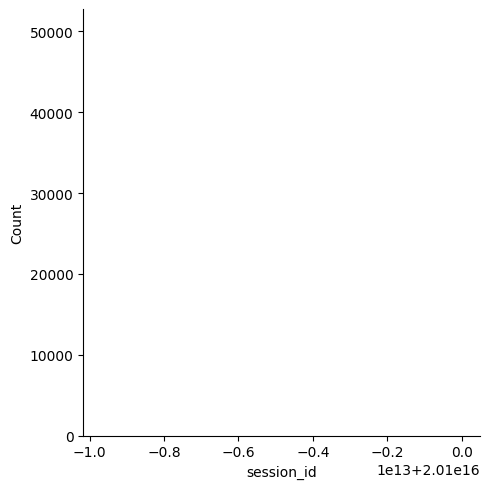

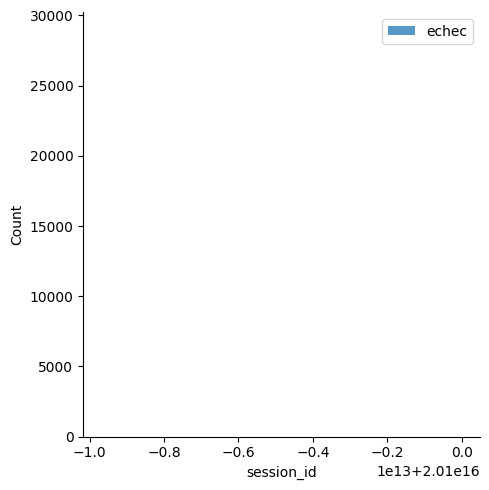

<Figure size 640x480 with 0 Axes>

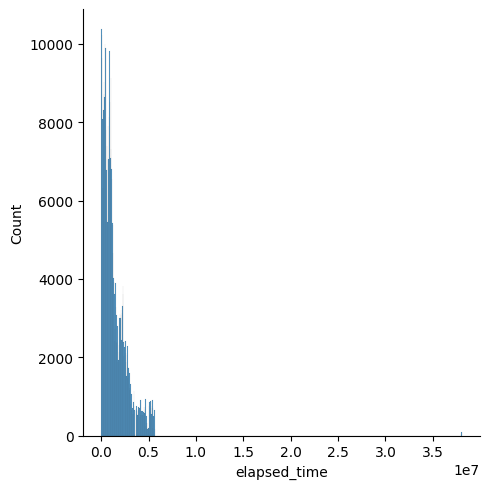

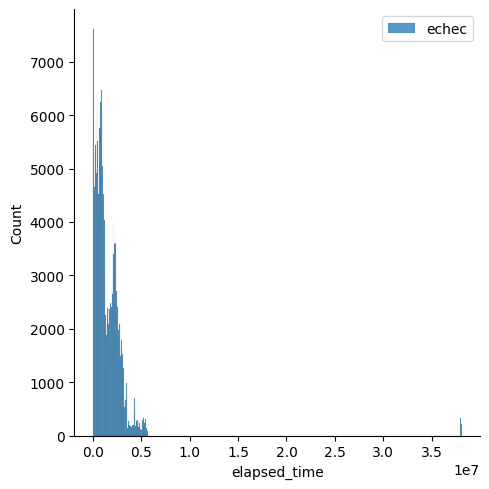

<Figure size 640x480 with 0 Axes>

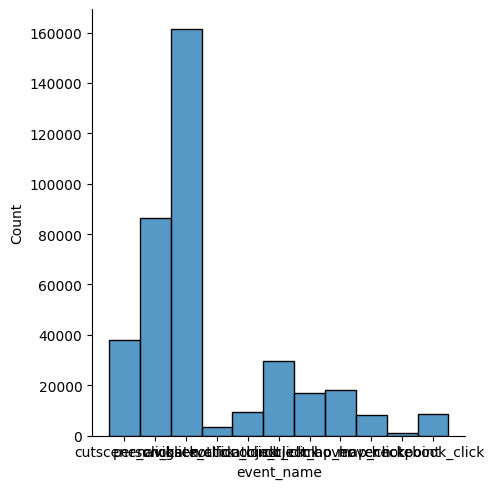

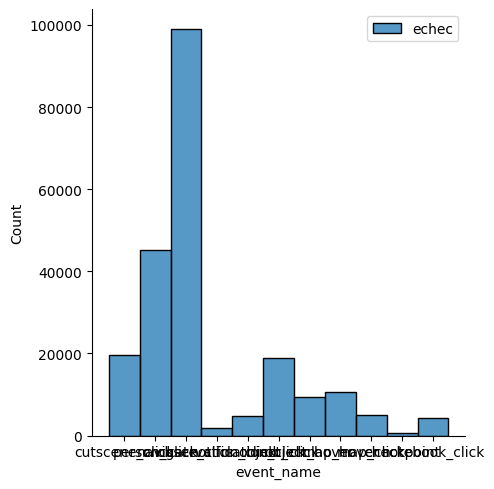

<Figure size 640x480 with 0 Axes>

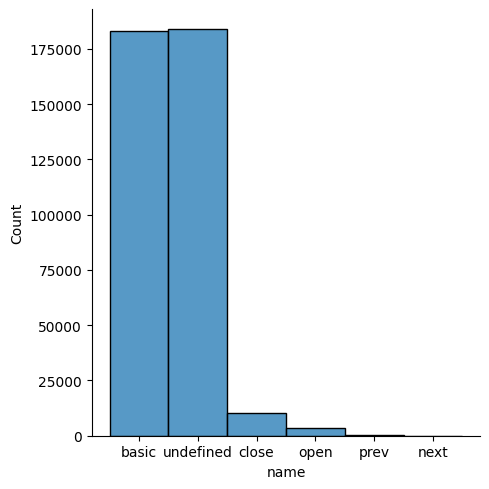

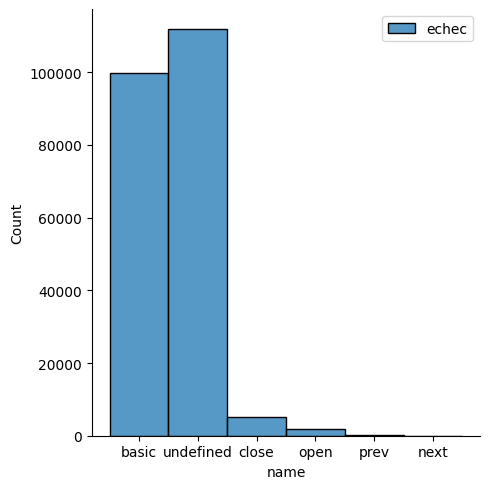

<Figure size 640x480 with 0 Axes>

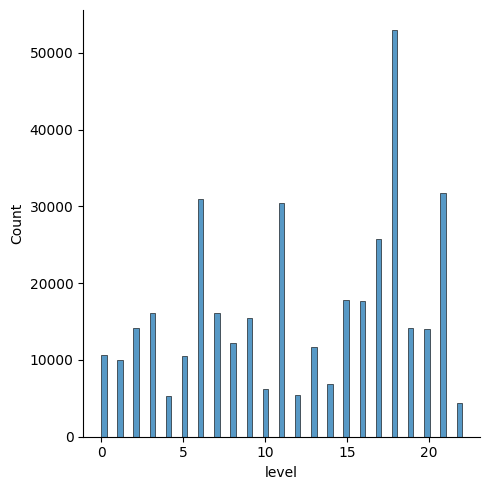

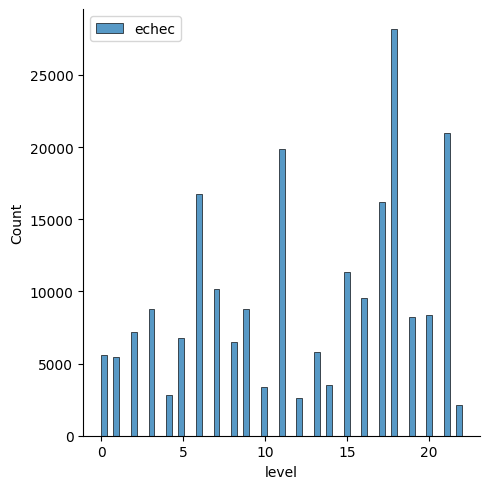

<Figure size 640x480 with 0 Axes>

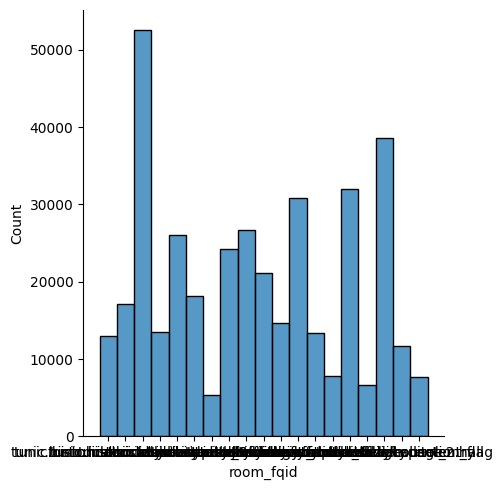

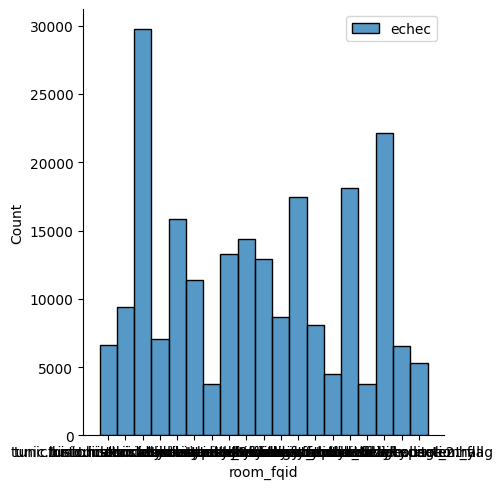

<Figure size 640x480 with 0 Axes>

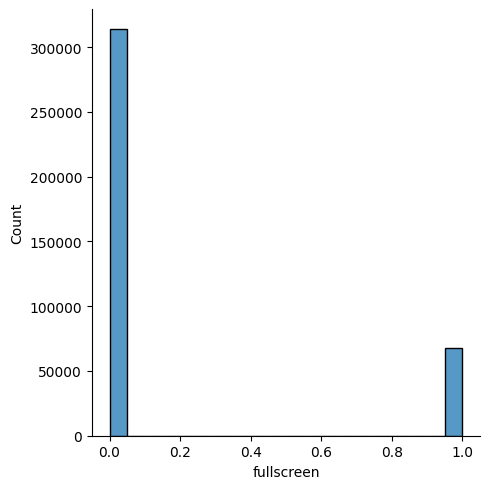

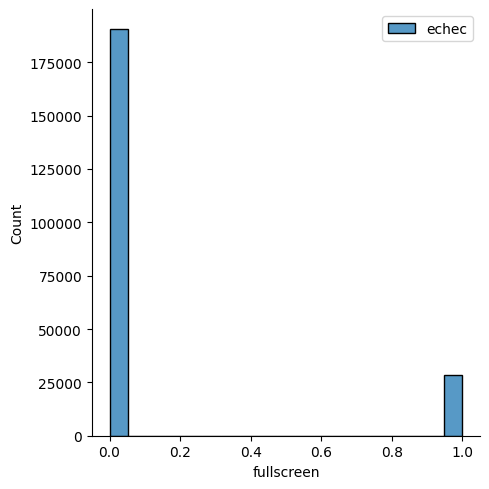

<Figure size 640x480 with 0 Axes>

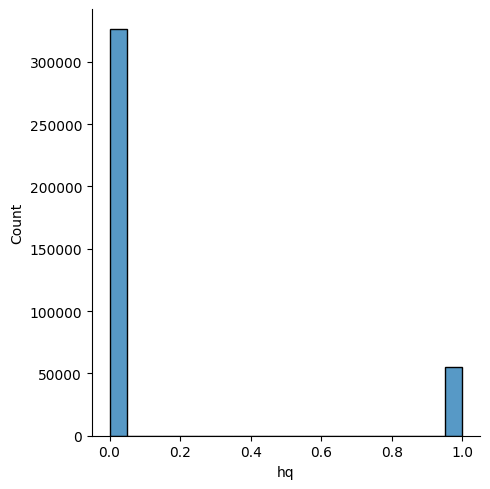

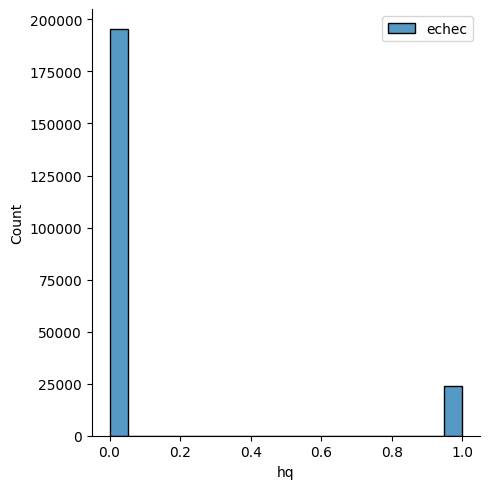

<Figure size 640x480 with 0 Axes>

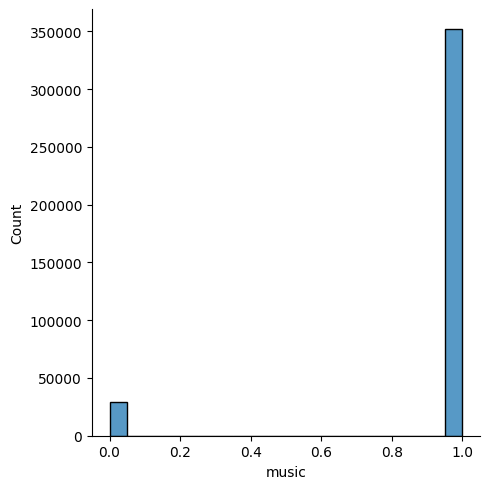

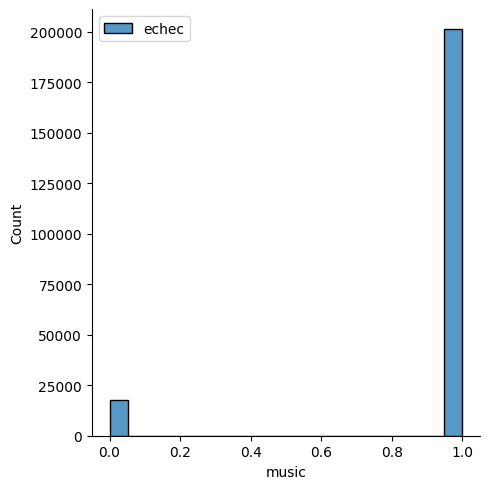

<Figure size 640x480 with 0 Axes>

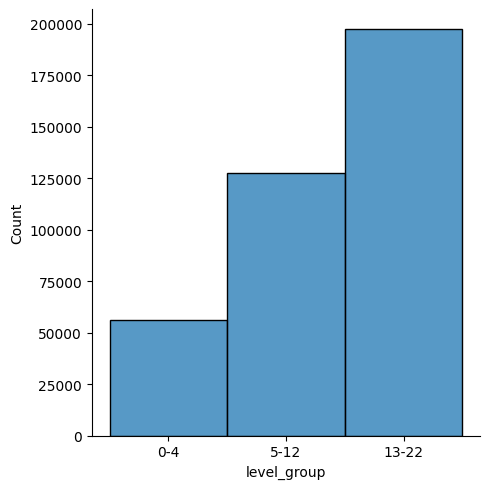

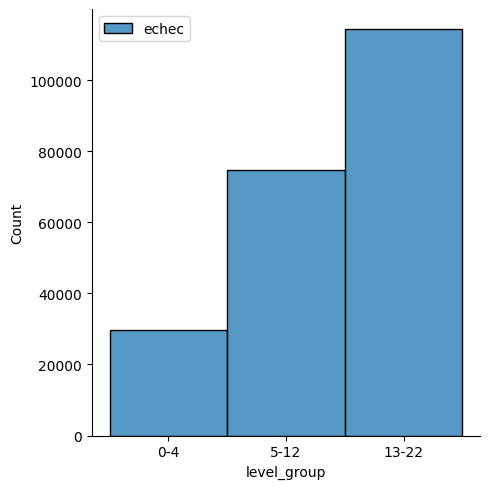

<Figure size 640x480 with 0 Axes>

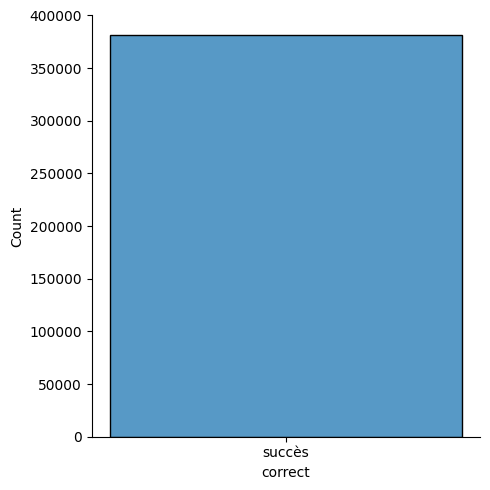

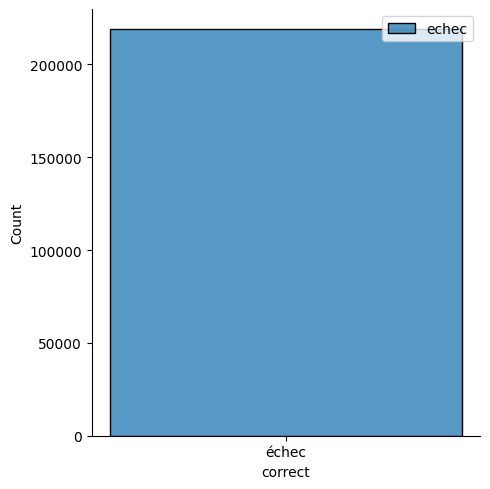

In [29]:
for col in zero_na:
    plt.figure()
    sns.displot(reussite_df[col] , label = 'succès')
    sns.displot(echec_df[col] , label = 'echec')
    plt.legend()



In [30]:
## Target / Little_na

<Figure size 640x480 with 0 Axes>

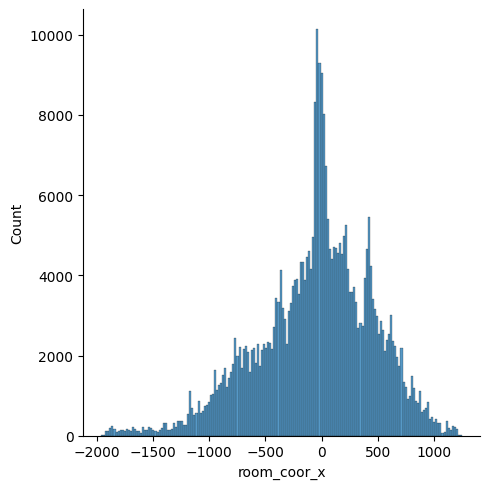

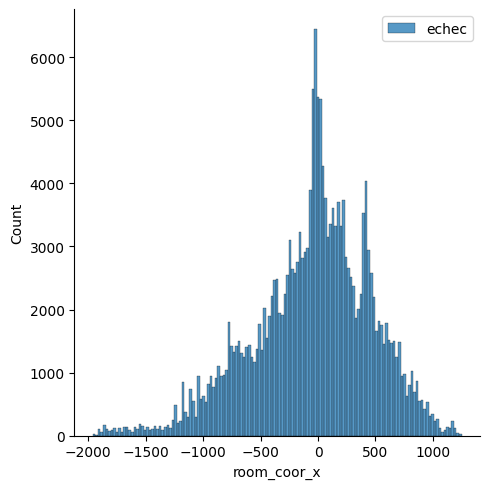

<Figure size 640x480 with 0 Axes>

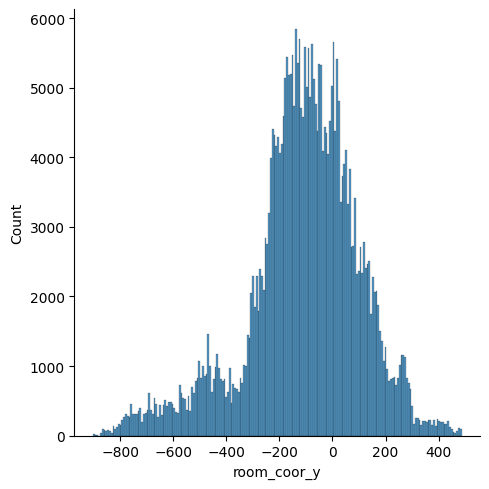

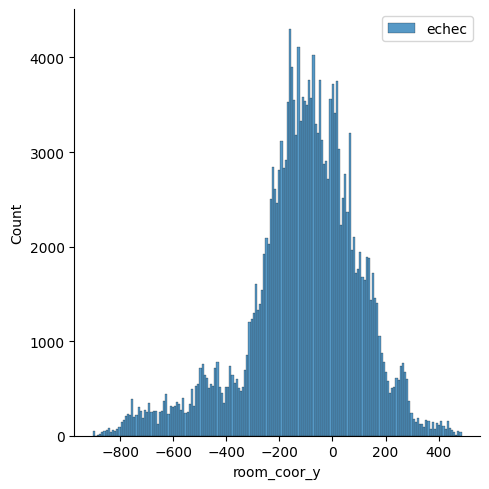

<Figure size 640x480 with 0 Axes>

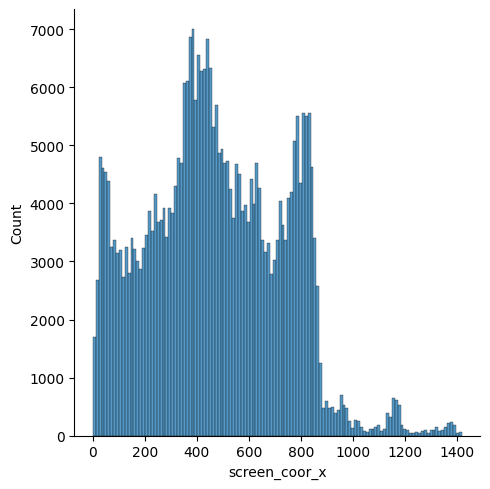

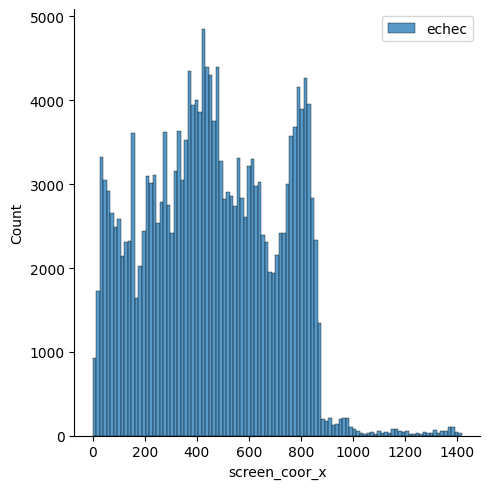

<Figure size 640x480 with 0 Axes>

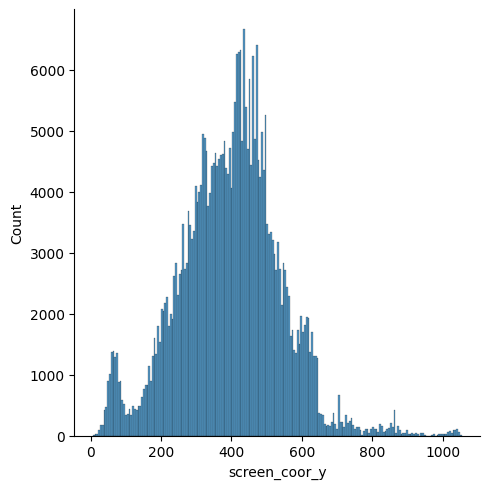

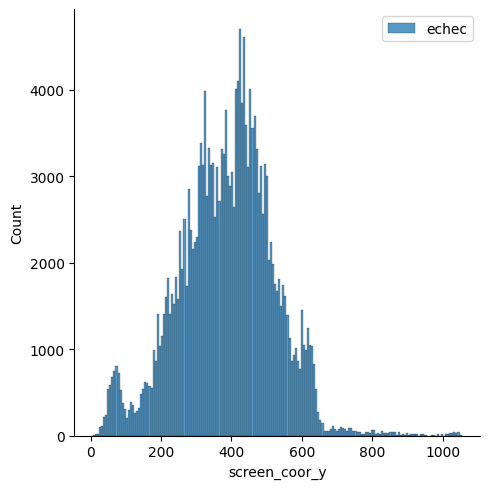

<Figure size 640x480 with 0 Axes>

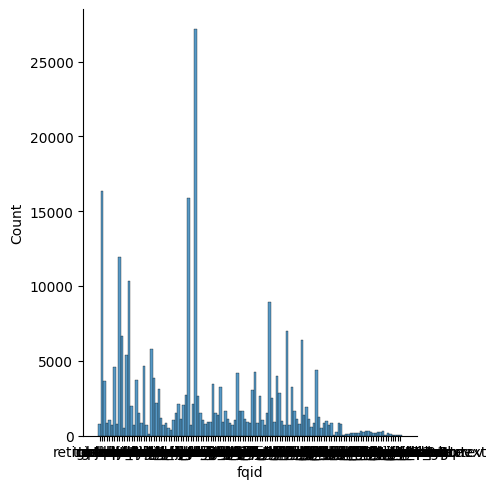

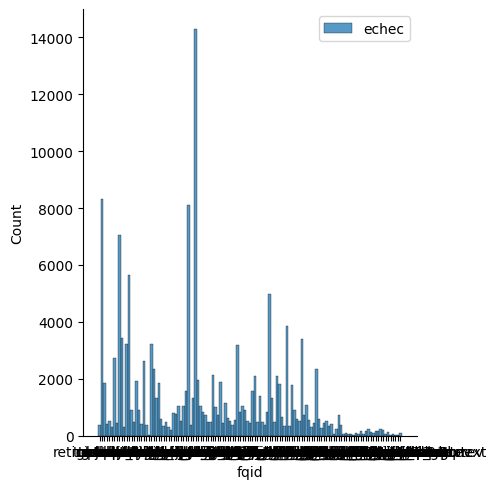

In [31]:
for col in little_na:
    plt.figure()
    sns.displot(reussite_df[col] , label = 'succès')
    sns.displot(echec_df[col] , label = 'echec')
    plt.legend()








<Axes: xlabel='fullscreen', ylabel='count'>

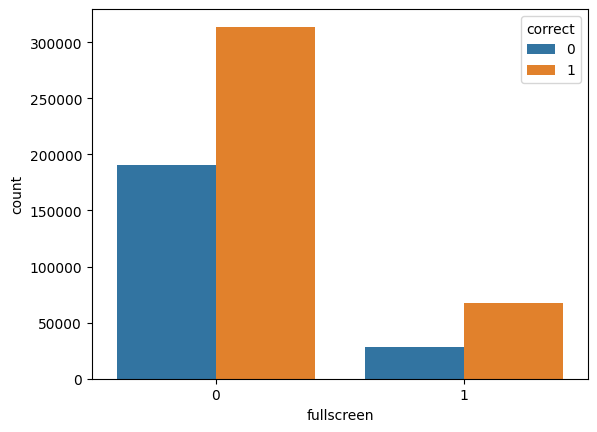

In [32]:
sns.countplot(x = 'fullscreen' ,  hue = 'correct' , data=df)

## Target / Medium_na

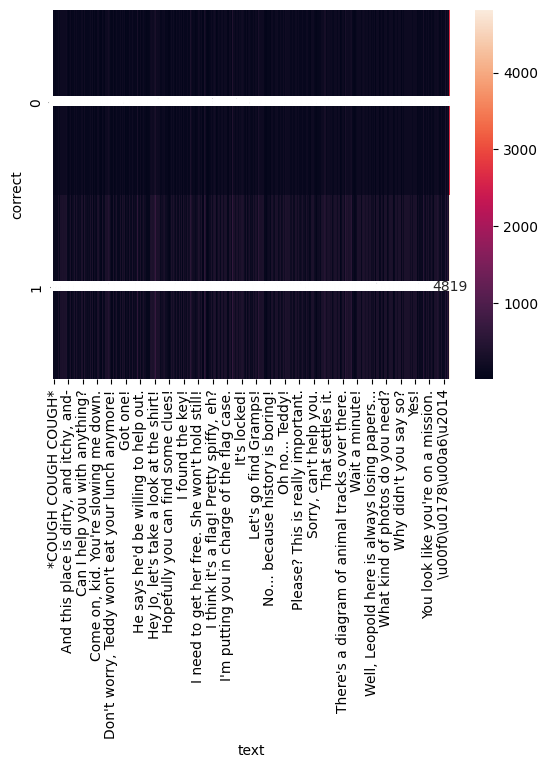

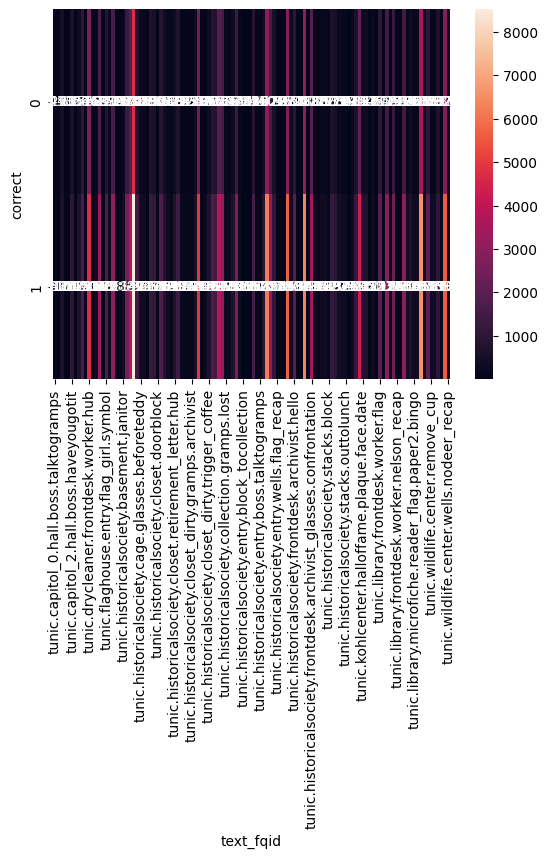

In [33]:
for col in medium_na:
    plt.figure()
    sns.heatmap(pd.crosstab(df['correct'] , df[col]) , annot=True , fmt='d')

### Analyse plus détaillée 

 * Medium_na / Medium_na 
       -- Dans le cas du test de khi-deux entre deux variables qualitatives , 

       -- la p-value représente la probabilité d'obtenir une table de contingence aussi extrême que celle observée dans l'échantillon,

       -- si les deux variables étaient indépendantes (c'est-à-dire, s'il n'y avait pas de relation entre elles).

       -- Si la p-value est inférieure à un niveau de signification préalablement déterminé (généralement 0,05),
       
       --  on rejette l'hypothèse nulle d'indépendance des deux variables et on conclut qu'il existe une relation significative entre elles.

       -- Une p-value très faible indique donc qu'il est très peu probable d'obtenir une telle table de contingence si les deux variables étaient indépendantes, 
       
       -- ce qui renforce la conclusion selon laquelle les deux variables sont liées.

 * Little_na / Little_na : pas vraiment de corrélation entre les variables 
 * Medium_na / Little_na  :
                          on a une relation linéaire entre certaines catégories de la variable texte et les coordonnées x , y (par exemple "Button still not working")
                          undefined est la categorie la plus représentée dans la variable texte 
                          on a donc comme piste la création  de deux variables supplémentaires (button_ko defectueux et une variable text_indefini)
 * Zero_na / Zero_na : 
                        Certaines variables très corrélés c'est le cas de fullscreen et hq par exemple . 
                        Création d'une variable statut correspondant aux catégories les plus réprésentés et les moins réprésentés dans la colonne level (à quel niveau du jeu l'événement s'est produit (0 à 22))
 * Zero_na / Medium_na 
 * Zero_na / Little_na 


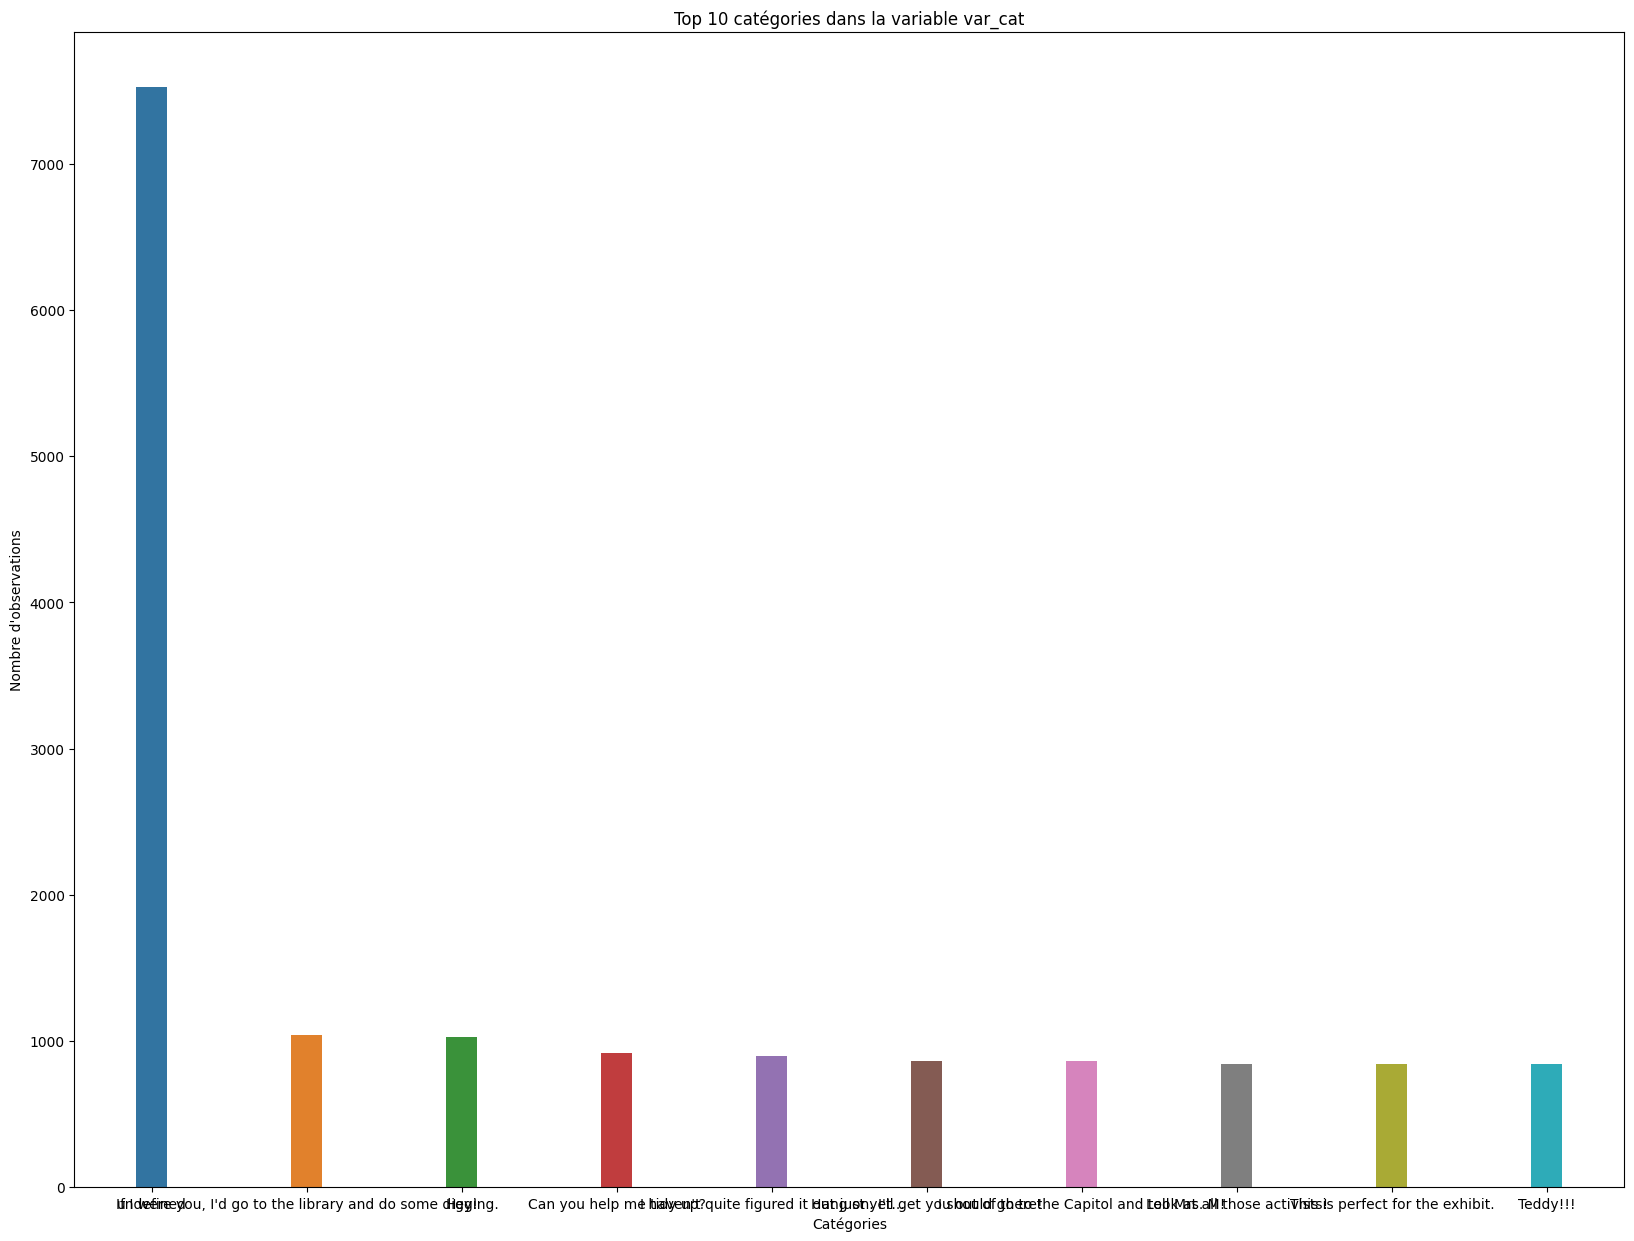

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionne les n premières catégories avec le plus d'occurrences
n = 10
top_cats = df['text'].value_counts().nlargest(n).index.tolist()

# Crée un diagramme à barres des n premières catégories
plt.figure(figsize=(20, 15))
sns.countplot(x='text', data=df, order=top_cats , width=0.5)

# Ajoute des étiquettes pour les axes et le titre
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'observations')
plt.title('Top ' + str(n) + ' catégories dans la variable var_cat')

# Affiche le diagramme à barres
plt.show()


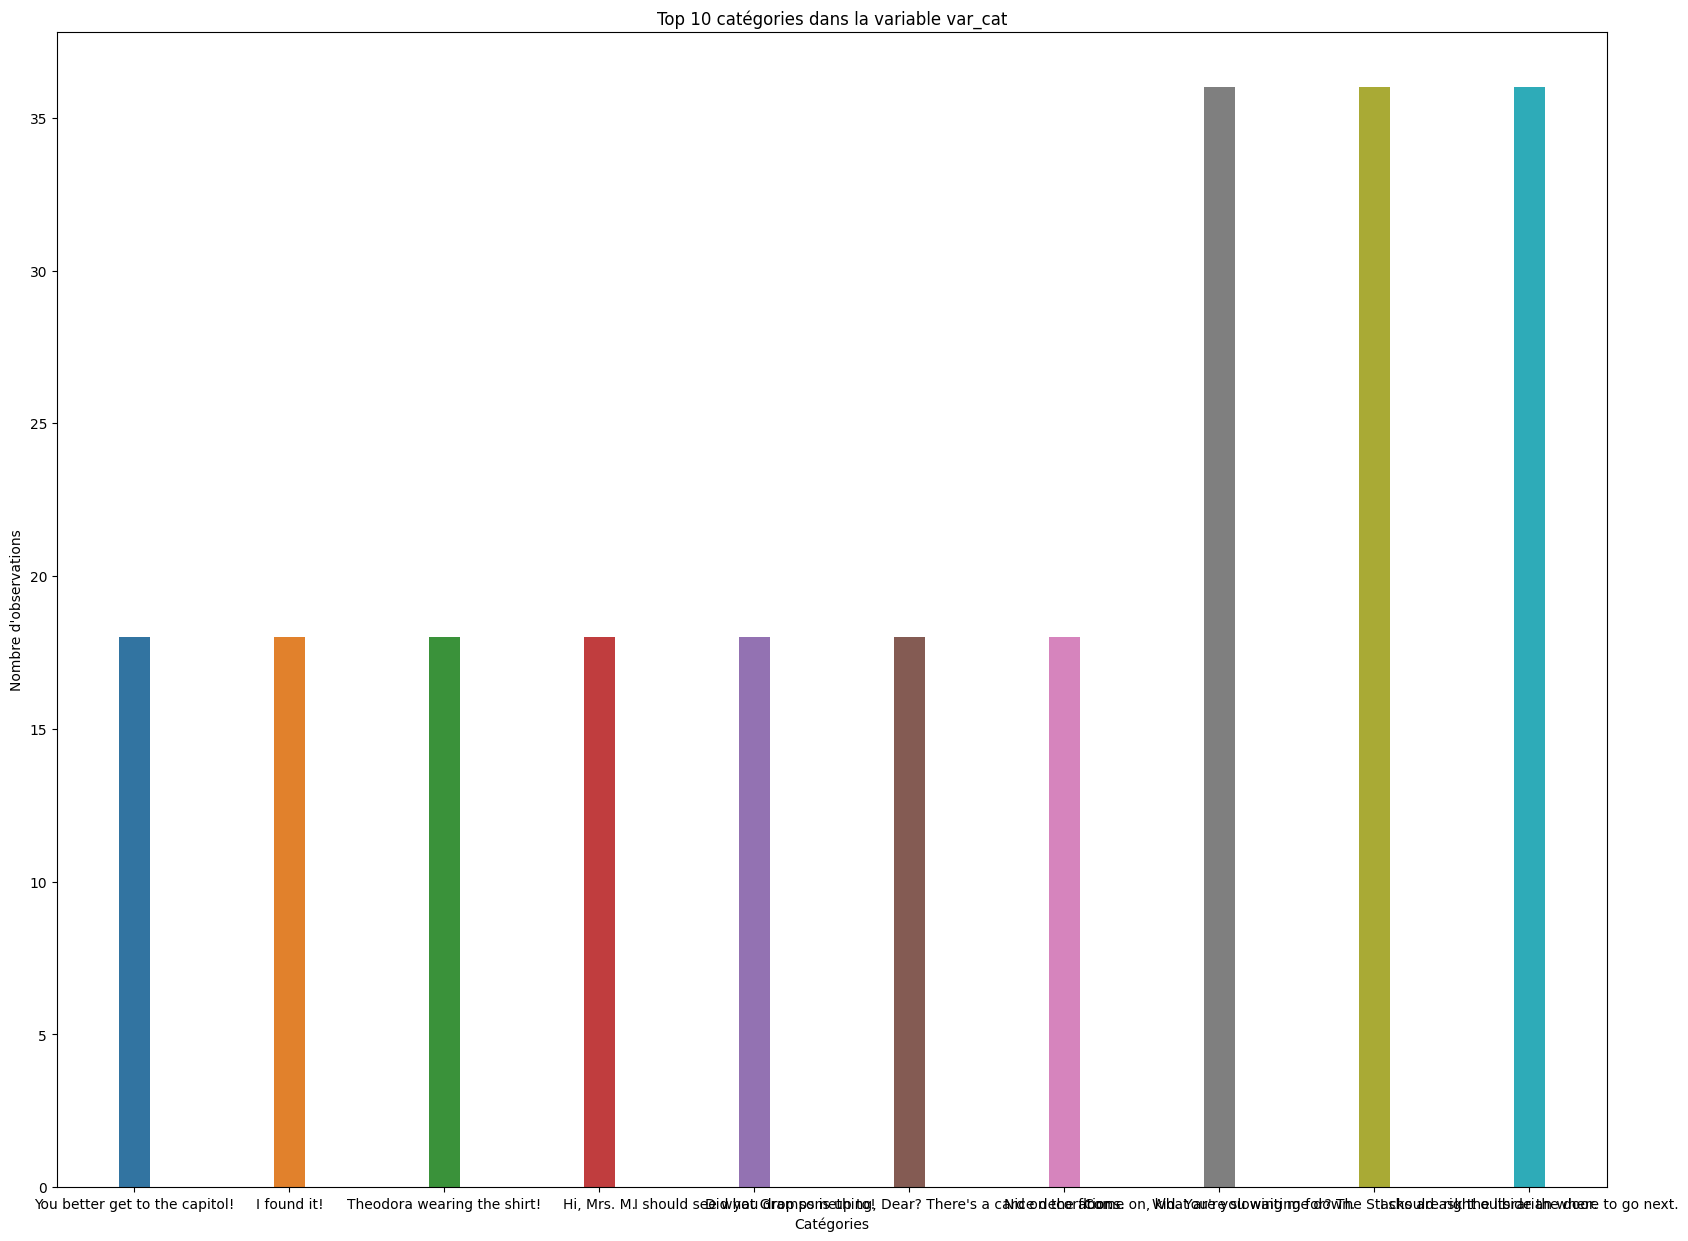

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionne les n dernières catégories avec le moins d'occurrences
n = 10
top_cats = df['text'].value_counts().nsmallest(n).index.tolist()

# Crée un diagramme à barres des n  catégories avec le moins d'occurrences
plt.figure(figsize=(20, 15))
sns.countplot(x='text', data=df, order=top_cats , width=0.2)

# Ajoute des étiquettes pour les axes et le titre
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'observations')
plt.title('Top ' + str(n) + ' catégories dans la variable var_cat')

# Affiche le diagramme à barres
plt.show()

In [188]:


df[medium_na].query("text == 'undefined'")



text                                 text_fqid
0       undefined      tunic.historicalsociety.closet.intro
1       undefined      tunic.historicalsociety.closet.intro
2       undefined      tunic.historicalsociety.closet.intro
3       undefined      tunic.historicalsociety.closet.intro
4       undefined      tunic.historicalsociety.closet.intro
...           ...                                       ...
588847  undefined  tunic.historicalsociety.entry.groupconvo
588848  undefined  tunic.historicalsociety.entry.groupconvo
588849  undefined  tunic.historicalsociety.entry.groupconvo
588850  undefined  tunic.historicalsociety.entry.groupconvo
588851  undefined  tunic.historicalsociety.entry.groupconvo

[7524 rows x 2 columns]

In [176]:
df[medium_na].query("text == \"Hmm. Button's still not working.\"")



text   
666     Hmm. Button's still not working.  \
667     Hmm. Button's still not working.   
668     Hmm. Button's still not working.   
669     Hmm. Button's still not working.   
670     Hmm. Button's still not working.   
...                                  ...   
518035  Hmm. Button's still not working.   
518036  Hmm. Button's still not working.   
518037  Hmm. Button's still not working.   
518038  Hmm. Button's still not working.   
518039  Hmm. Button's still not working.   

                                       text_fqid  
666     tunic.historicalsociety.basement.janitor  
667     tunic.historicalsociety.basement.janitor  
668     tunic.historicalsociety.basement.janitor  
669     tunic.historicalsociety.basement.janitor  
670     tunic.historicalsociety.basement.janitor  
...                                          ...  
518035  tunic.historicalsociety.basement.janitor  
518036  tunic.historicalsociety.basement.janitor  
518037  tunic.historicalsociety.basement.janitor  
518038  tunic.historicalsociety.basement.janitor  
518039  tunic.historicalsociety.basement.janitor  

[342 rows x 2 columns]

### Création d'une nouvelle variable "button_ko"

In [162]:

### Création d'une nouvelle variable "Bouton ne marche pas"

np.sum(df[medium_na] == '"Hmm. Button\'s still not working."' , axis = 1) > 0


0         False
1         False
2         False
3         False
4         False
          ...  
599995    False
599996    False
599997    False
599998    False
599999    False
Length: 600000, dtype: bool


### Création d'une nouvelle variable "text_undefined"

In [194]:
df['text_undefined'] = np.sum(df[medium_na] ==  'undefined'  , axis=1) > 0

In [197]:
text_undefined_df = df[df["text_undefined"] == True ]
text_defined_df = df[df["text_undefined"] == False ]

<Figure size 640x480 with 0 Axes>

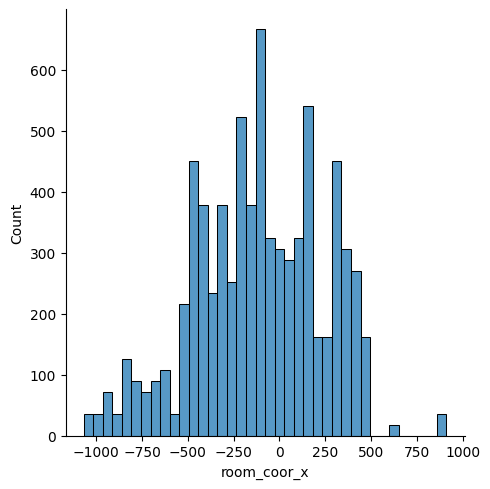

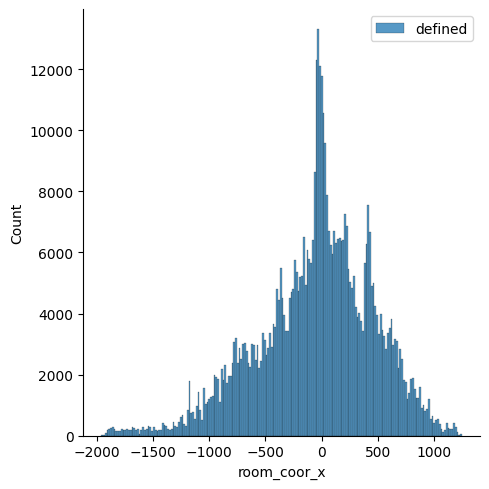

<Figure size 640x480 with 0 Axes>

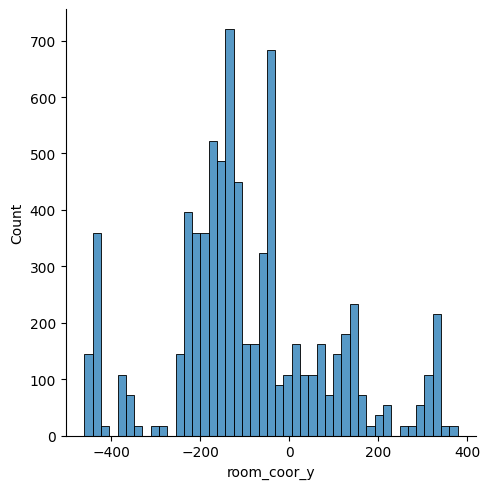

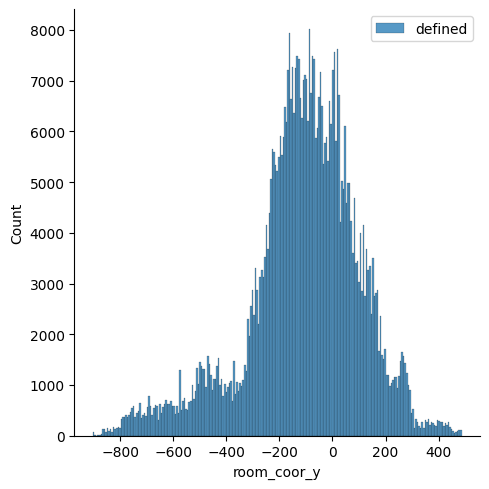

<Figure size 640x480 with 0 Axes>

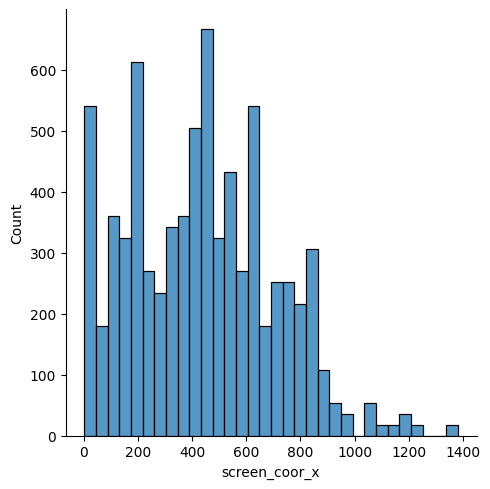

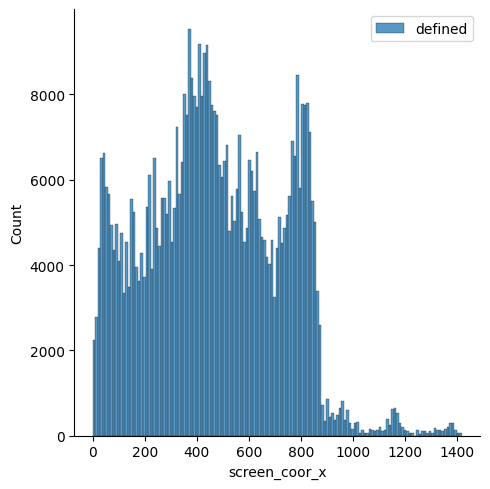

<Figure size 640x480 with 0 Axes>

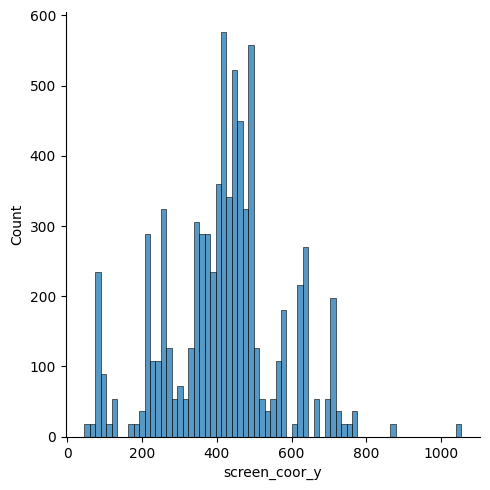

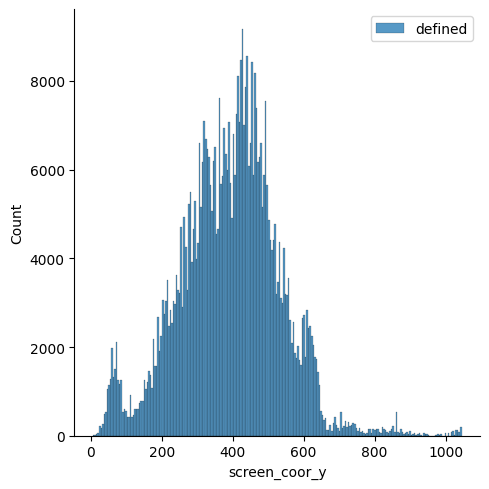

<Figure size 640x480 with 0 Axes>

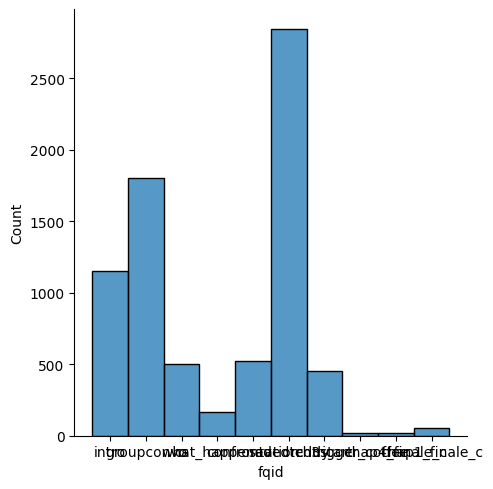

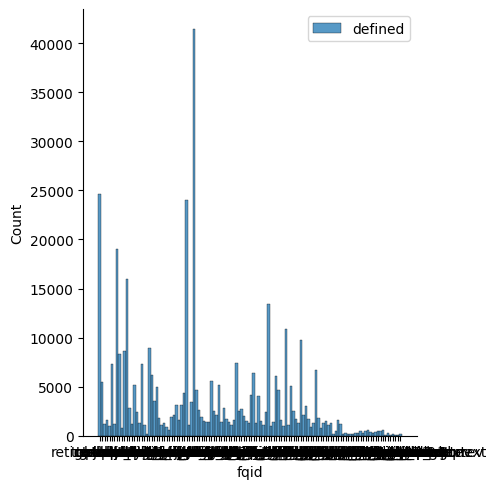

In [198]:
for col in little_na:
    plt.figure()
    sns.displot(text_undefined_df[col] , label = 'undefined')
    sns.displot(text_defined_df[col] , label = 'defined')
    plt.legend()



In [74]:
import scipy.stats
t = pd.crosstab(df.head(100).text, df.head(100).text_fqid)
scipy.stats.chi2_contingency(t)






Chi2ContingencyResult(statistic=100.0, pvalue=5.285148360943219e-20, dof=5, expected_freq=array([[14.76,  3.24],
       [14.76,  3.24],
       [14.76,  3.24],
       [ 8.2 ,  1.8 ],
       [14.76,  3.24],
       [14.76,  3.24]]))

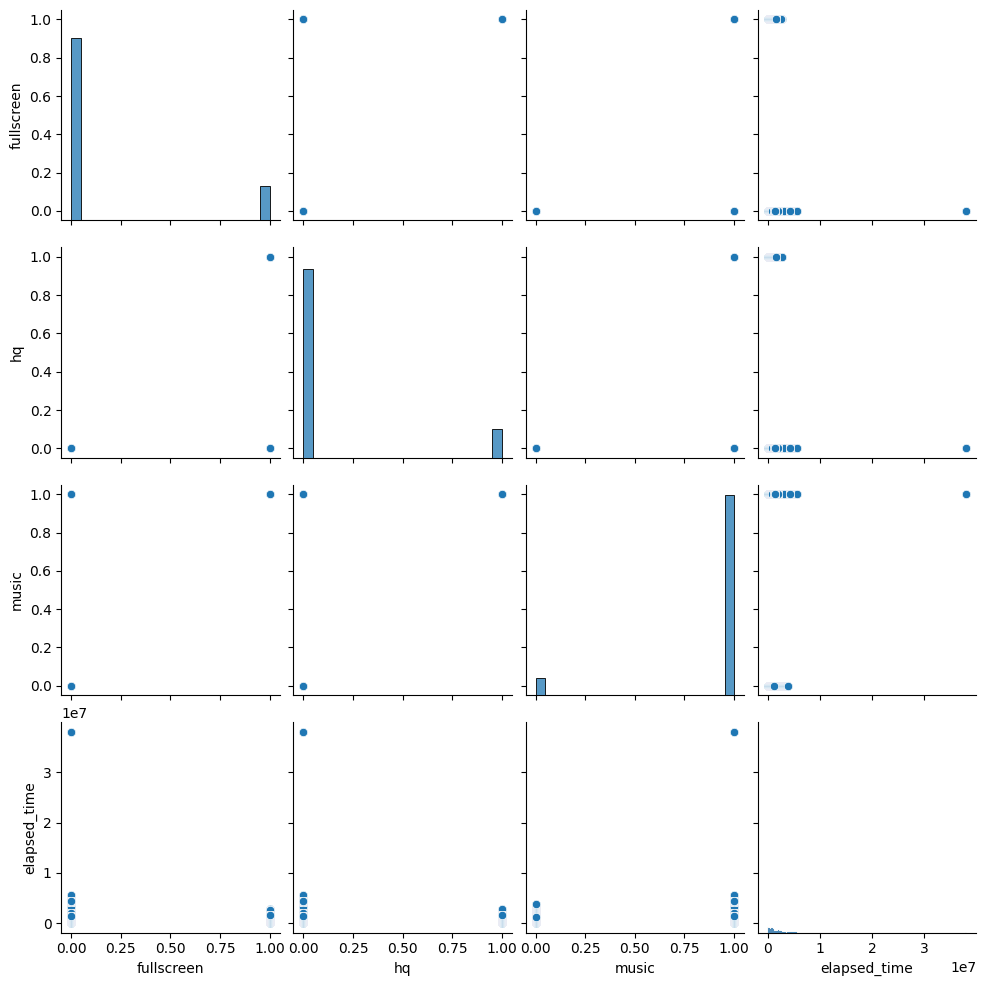

In [54]:
sns.pairplot(df[['fullscreen', 'hq', 'music', 'elapsed_time']])

<Axes: >

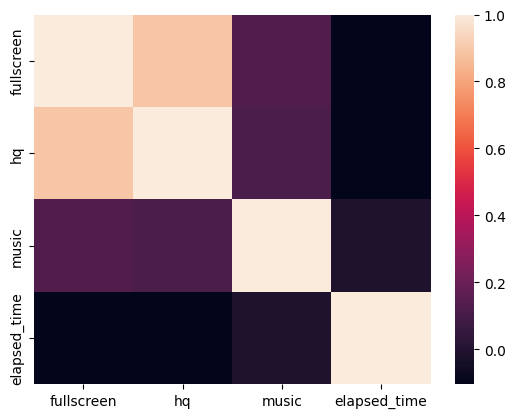

In [51]:
sns.heatmap(df[['fullscreen', 'hq', 'music', 'elapsed_time']].corr())

# Clustermap interessant aussi 

/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


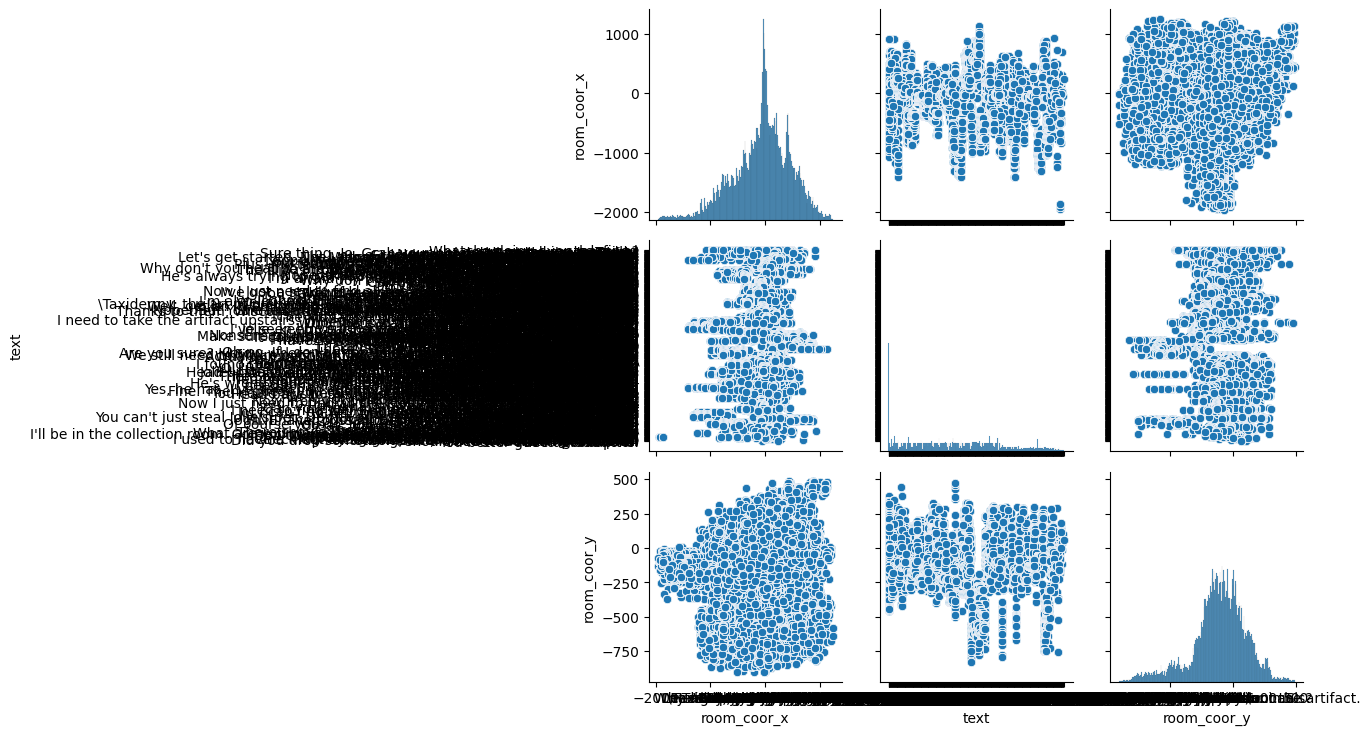

In [87]:
sns.pairplot(data = df , vars = ['room_coor_x' , 'text' ,  'room_coor_y'])


<Axes: xlabel='text_fqid', ylabel='text'>

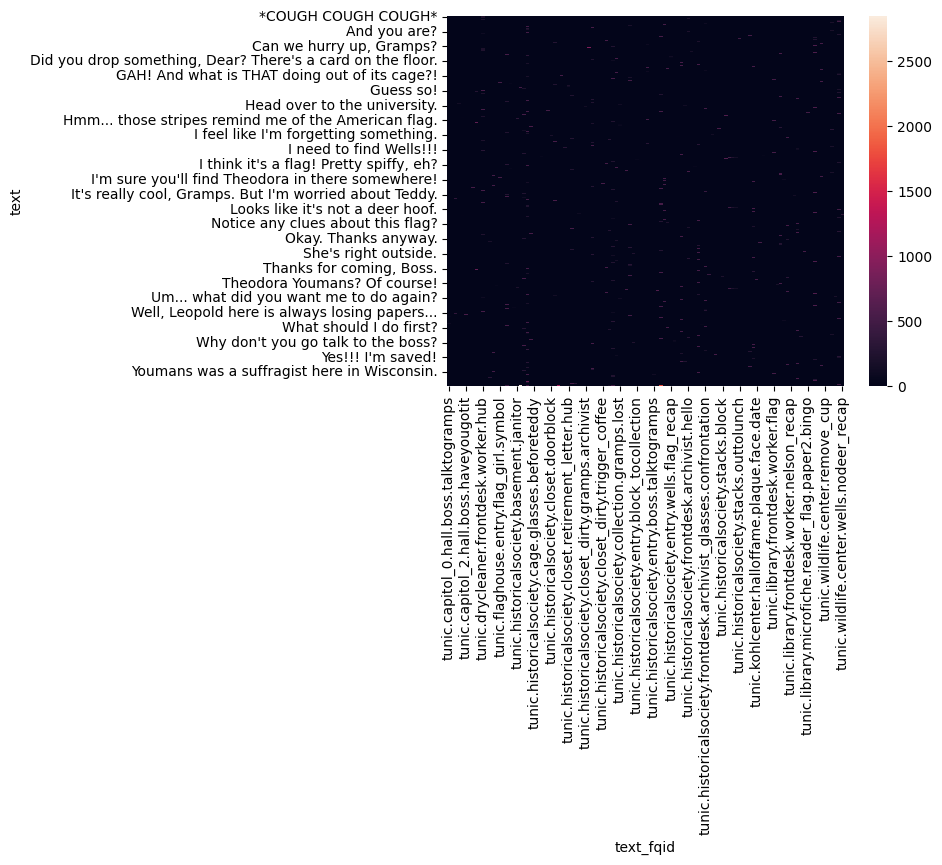

In [88]:
sns.heatmap(pd.crosstab(df.text, df.text_fqid))

In [77]:
scipy.stats.kendalltau(df.head(50).room_coor_x, df.head(50).text)

SignificanceResult(statistic=nan, pvalue=nan)

<Axes: >

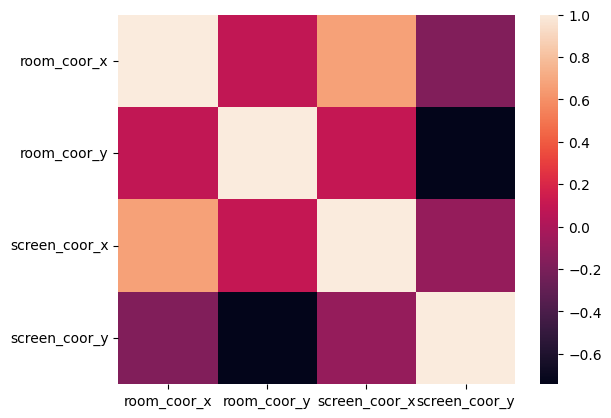

In [63]:


sns.heatmap(df[['room_coor_x'	, 'room_coor_y'	, 'screen_coor_x'	, 'screen_coor_y'	]].corr())

### Relation Level / Text Undefined

In [201]:
df[['level' , 'level_group' , 'name' , 'event_name']]


level level_group   name      event_name
0           0         0-4  basic  cutscene_click
1           0         0-4  basic  cutscene_click
2           0         0-4  basic  cutscene_click
3           0         0-4  basic  cutscene_click
4           0         0-4  basic  cutscene_click
...       ...         ...    ...             ...
599995     16       13-22  basic  cutscene_click
599996     16       13-22  basic  cutscene_click
599997     16       13-22  basic  cutscene_click
599998     16       13-22  basic  cutscene_click
599999     16       13-22  basic  cutscene_click

[600000 rows x 4 columns]

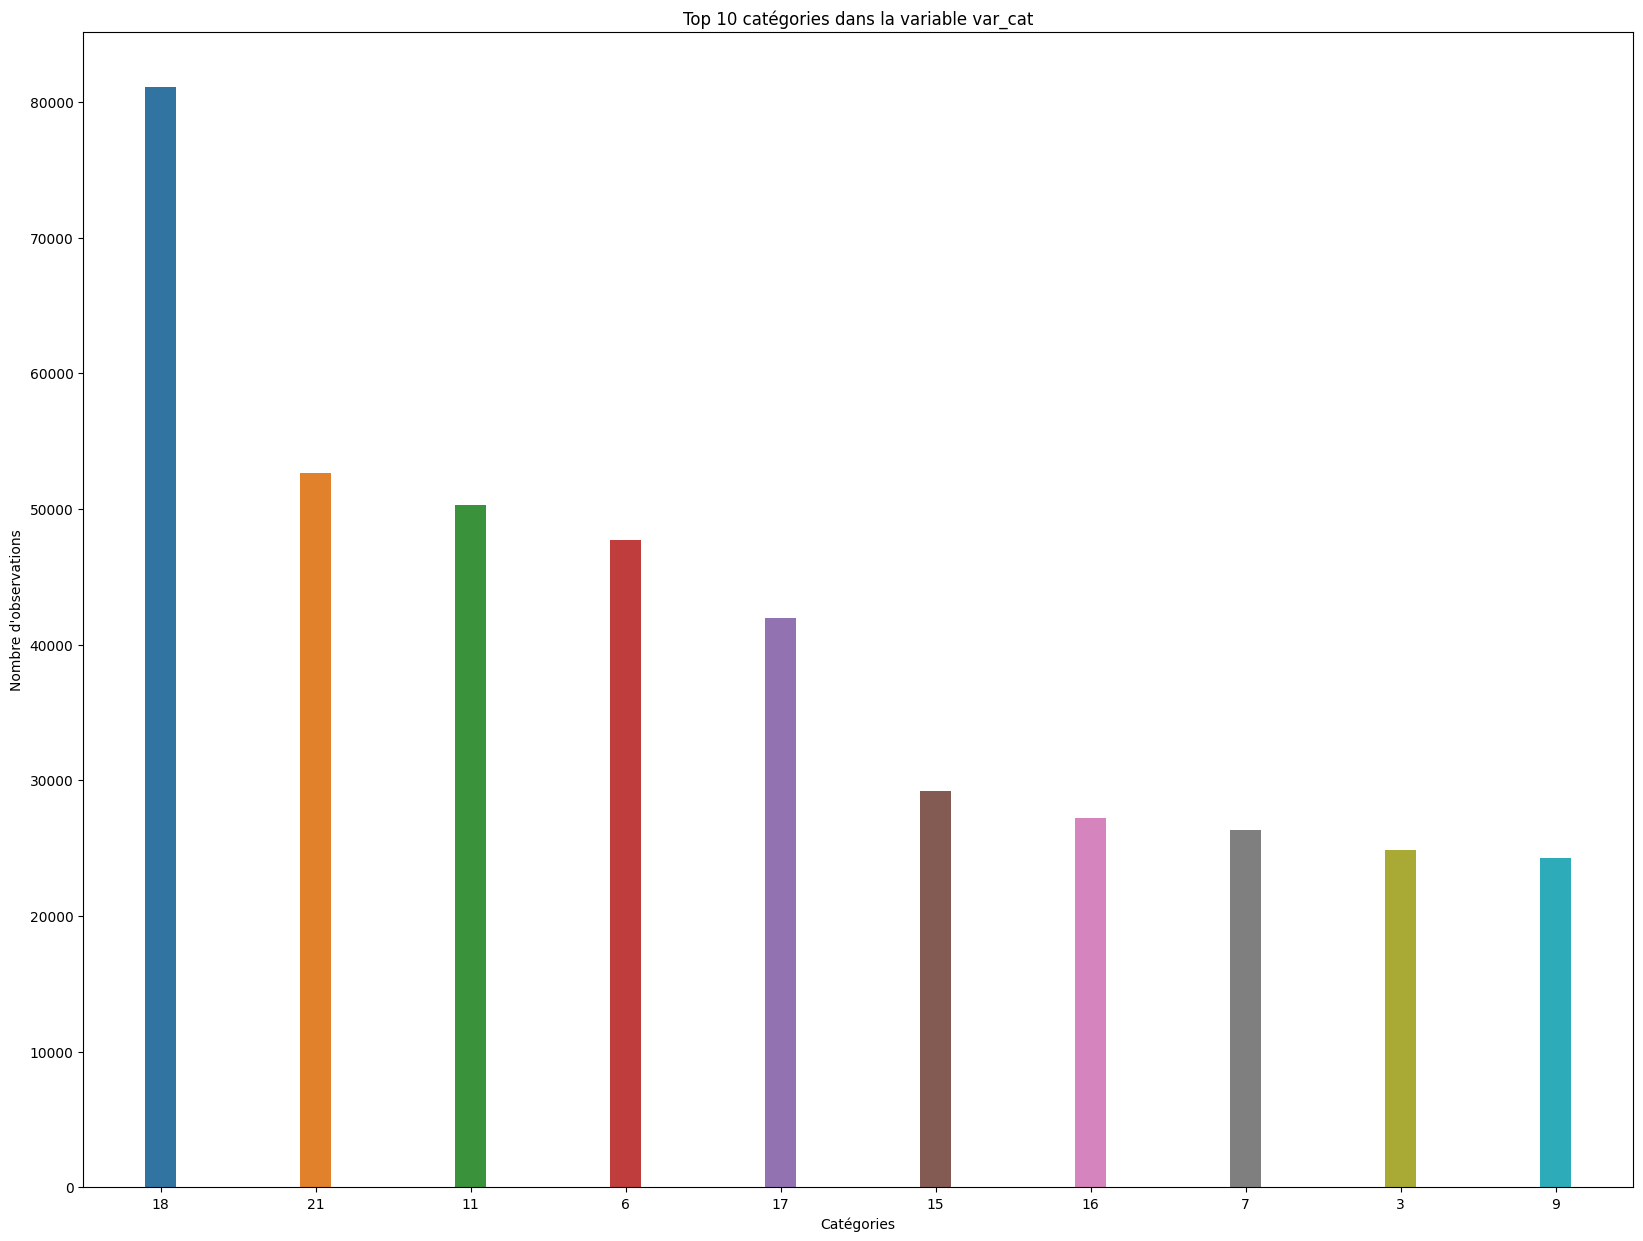

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionne les n premières catégories avec le plus d'occurrences
n = 10
top_cats_large = df['level'].value_counts().nlargest(n).index.tolist()

# Crée un diagramme à barres des n premières catégories
plt.figure(figsize=(20, 15))
sns.countplot(x='level', data=df, order=top_cats_large , width=0.2)

# Ajoute des étiquettes pour les axes et le titre
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'observations')
plt.title('Top ' + str(n) + ' catégories dans la variable var_cat')

# Affiche le diagramme à barres
plt.show()

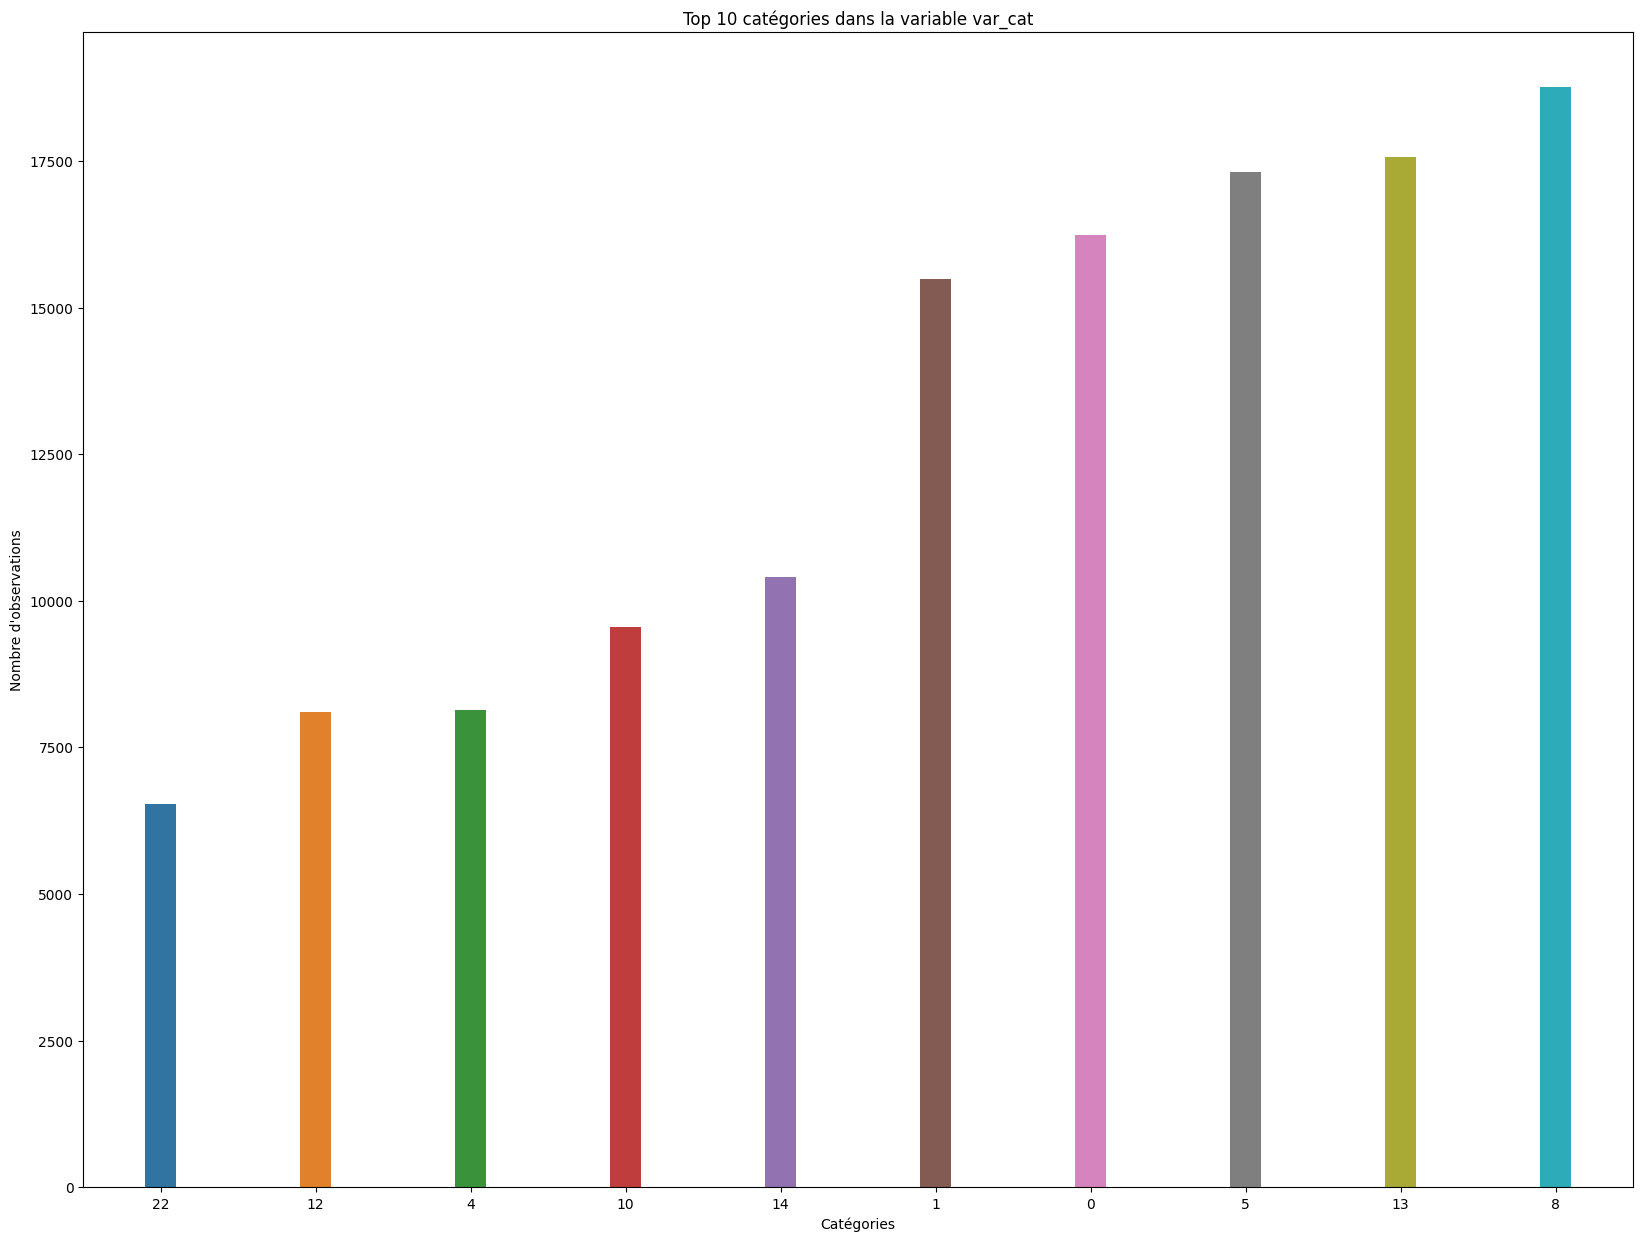

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionne les n dernières catégories avec le moins d'occurrences
n = 10
top_cats_small = df['level'].value_counts().nsmallest(n).index.tolist()

# Crée un diagramme à barres des n  catégories avec le moins d'occurrences
plt.figure(figsize=(20, 15))
sns.countplot(x='level', data=df, order=top_cats_small , width=0.2)

# Ajoute des étiquettes pour les axes et le titre
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'observations')
plt.title('Top ' + str(n) + ' catégories dans la variable var_cat')

# Affiche le diagramme à barres
plt.show()

In [218]:
df['level'].value_counts().nsmallest(10)

level
22     6534
12     8100
4      8136
10     9558
14    10404
1     15480
0     16236
5     17316
13    17568
8     18756
Name: count, dtype: int64

In [228]:
import pandas as pd

def undefined(df):
    level_series = pd.Series(df['level'])
    if level_series.isin([18, 21, 11, 6, 17, 15, 16, 7, 3, 9]).any():
        return 'Niveaux les plus représentés'
    elif level_series.isin([22, 12, 4, 10, 14, 1, 0, 5, 13, 8]).any():
        return 'Niveaux les moins représentés'
    else:
        return 'inconnu'



In [229]:
import pandas as pd

def undefined(df):
    level_series = pd.Series(df['level'])
    if level_series.isin([18, 21, 11, 6, 17, 15, 16, 7, 3, 9]).any():
        return 'Niveaux les plus représentés'
    elif level_series.isin([22, 12, 4, 10, 14, 1, 0, 5, 13, 8]).any():
        return 'Niveaux les moins représentés'
    else:
        return 'inconnu'


In [230]:
df['statut'] = df.apply(undefined , axis =1)


/var/folders/20/j5yjkwj15ts7__y_rbh9222h0000gn/T/ipykernel_41739/1086189676.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

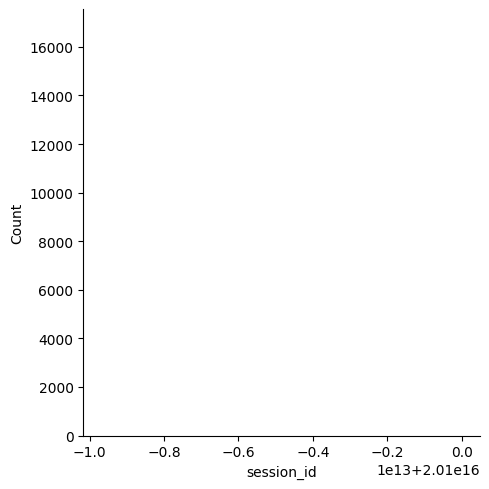

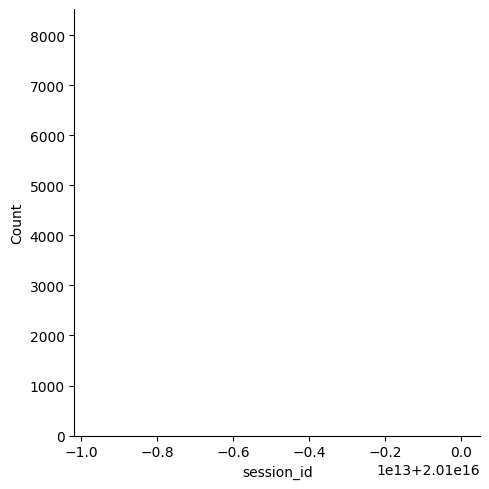

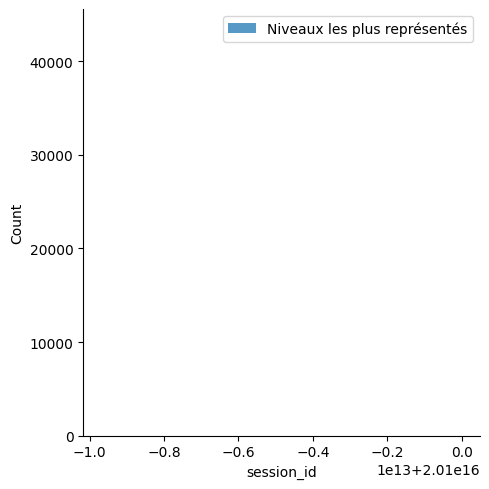

<Figure size 640x480 with 0 Axes>

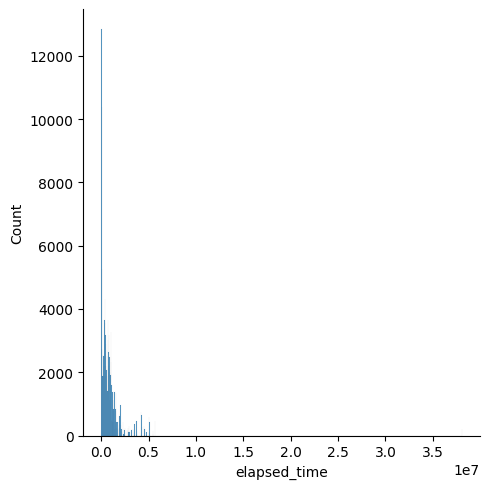

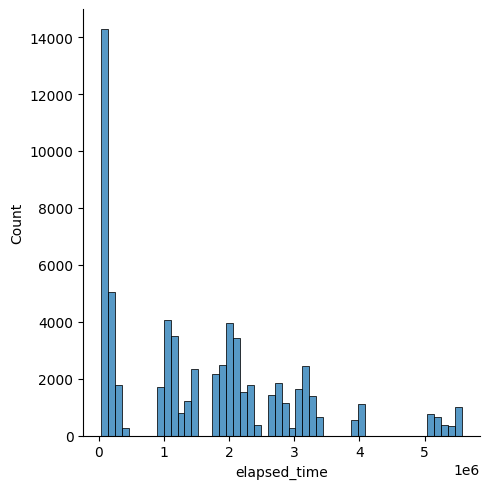

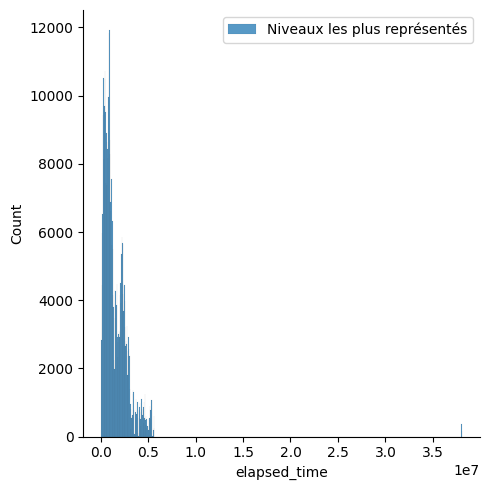

<Figure size 640x480 with 0 Axes>

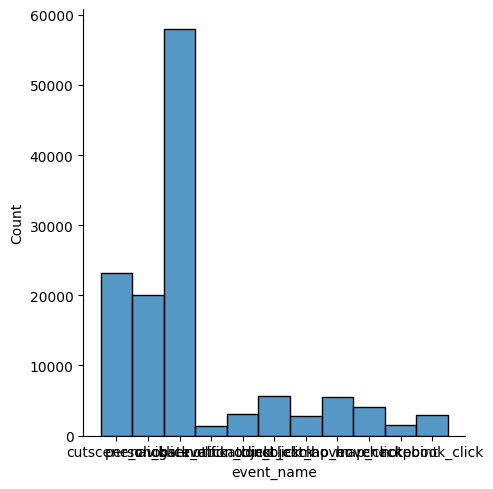

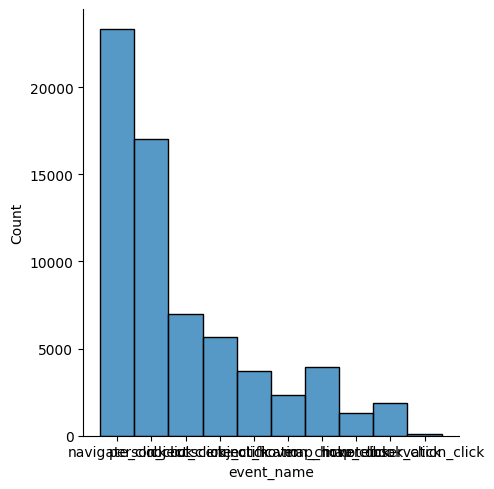

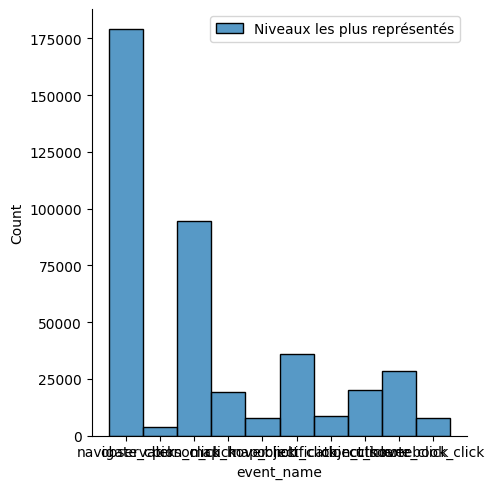

<Figure size 640x480 with 0 Axes>

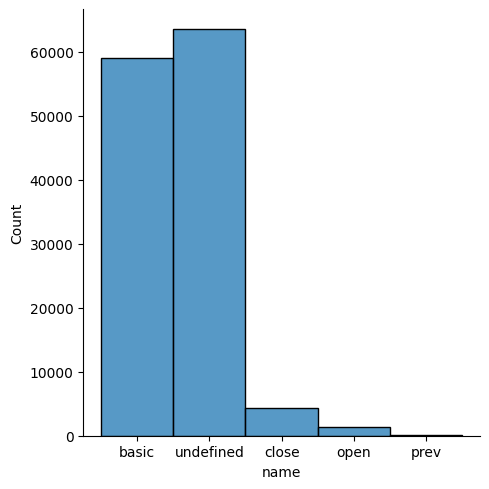

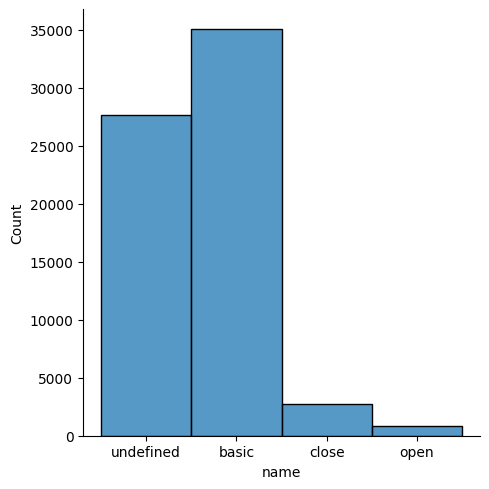

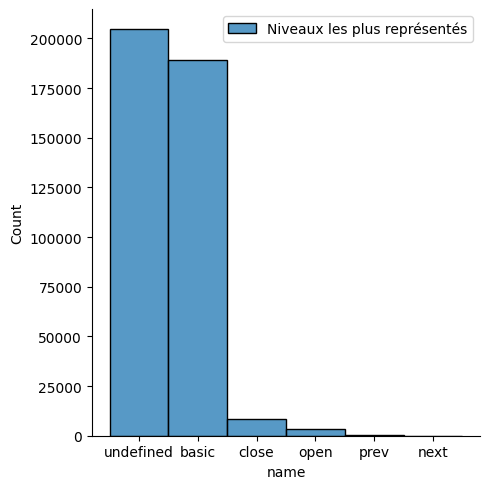

<Figure size 640x480 with 0 Axes>

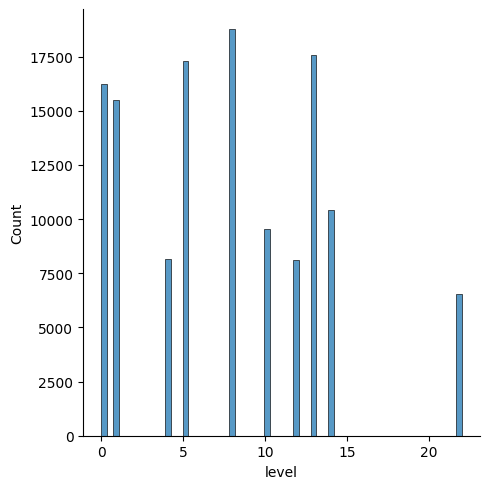

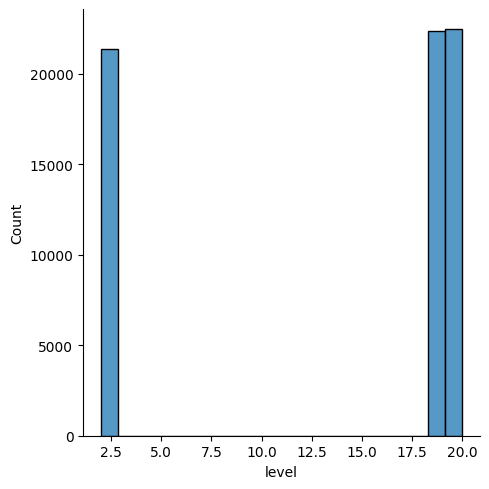

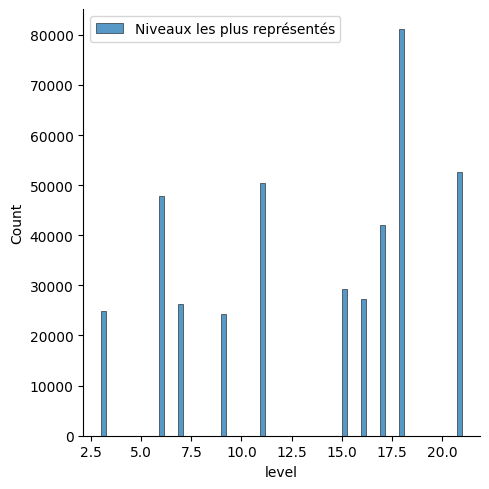

<Figure size 640x480 with 0 Axes>

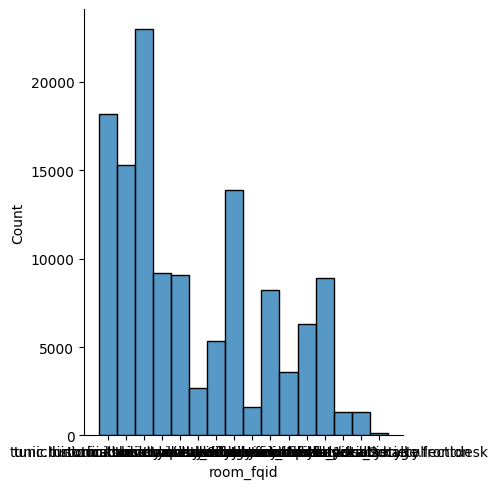

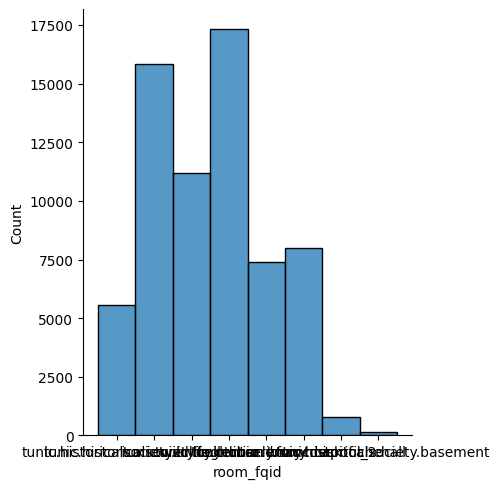

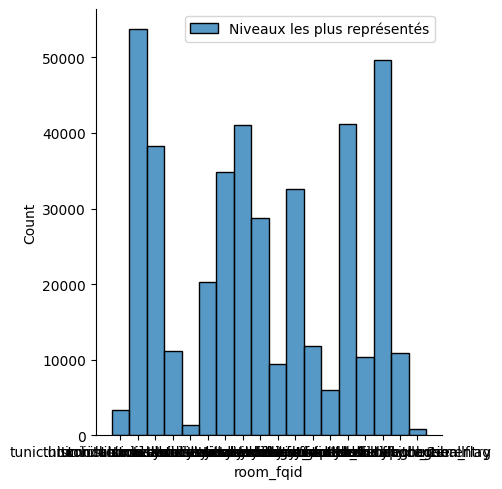

<Figure size 640x480 with 0 Axes>

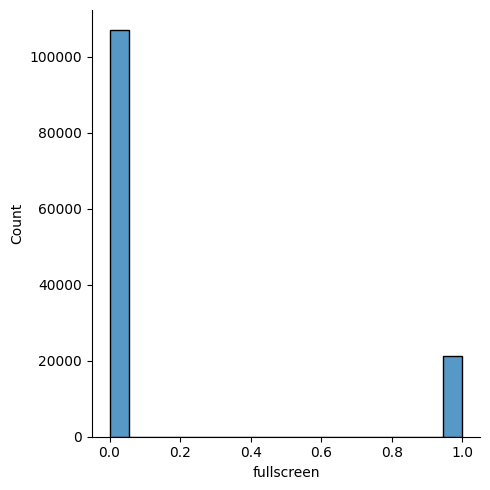

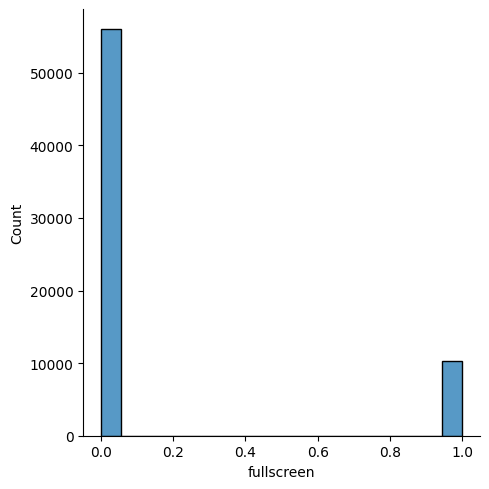

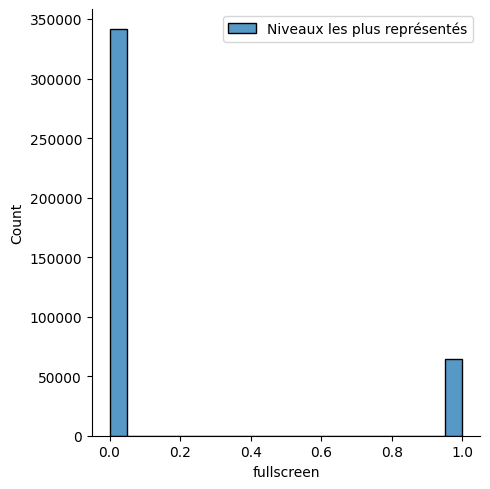

<Figure size 640x480 with 0 Axes>

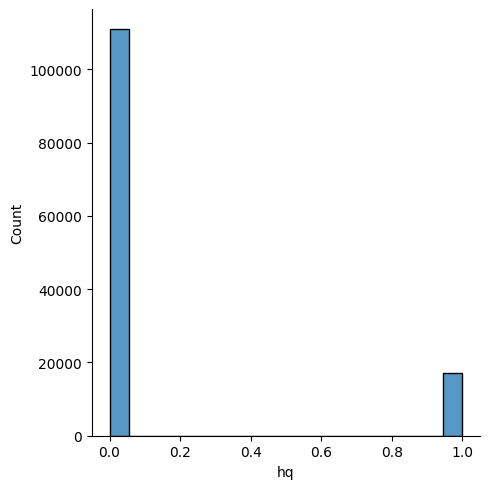

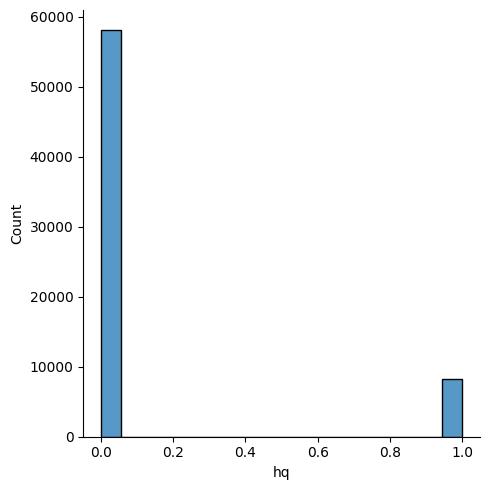

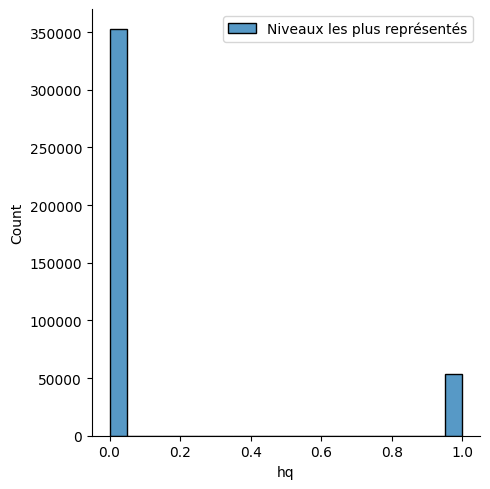

<Figure size 640x480 with 0 Axes>

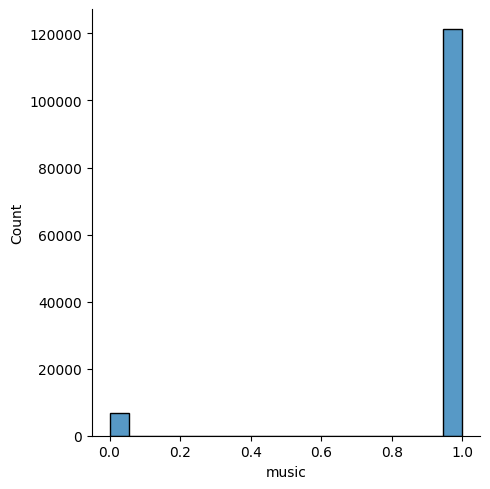

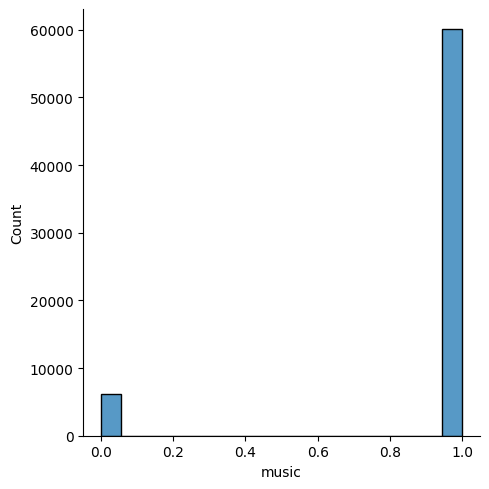

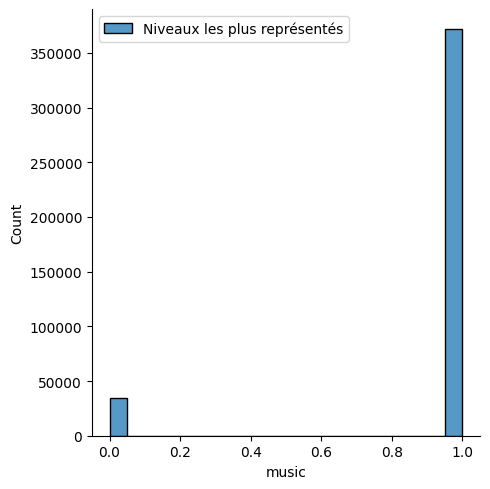

<Figure size 640x480 with 0 Axes>

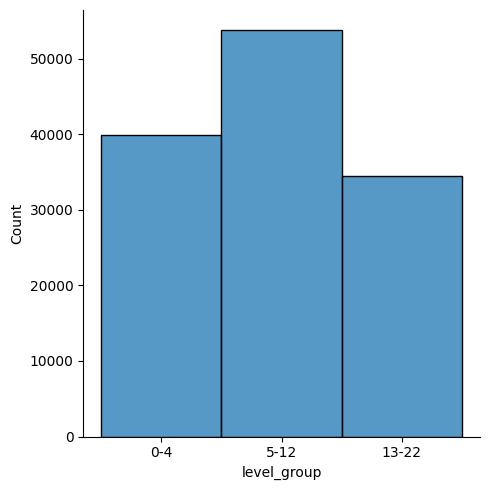

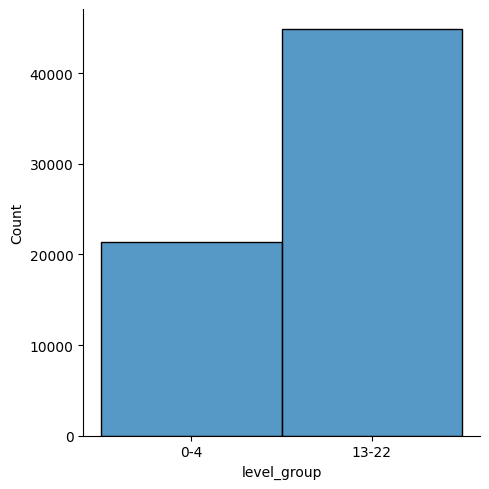

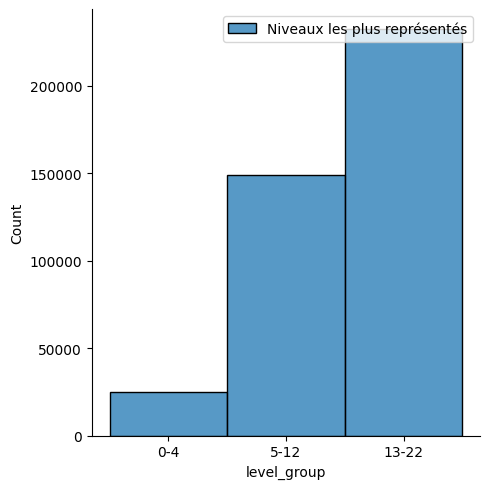

<Figure size 640x480 with 0 Axes>

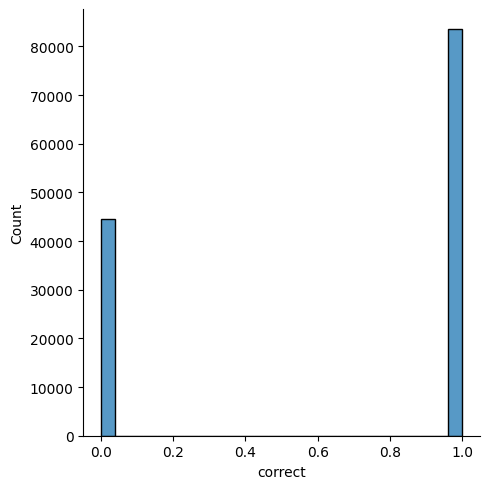

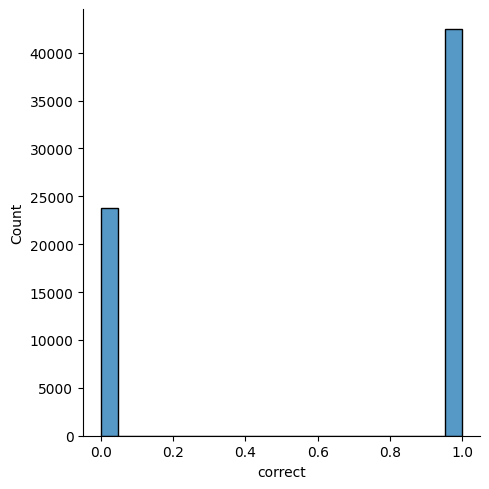

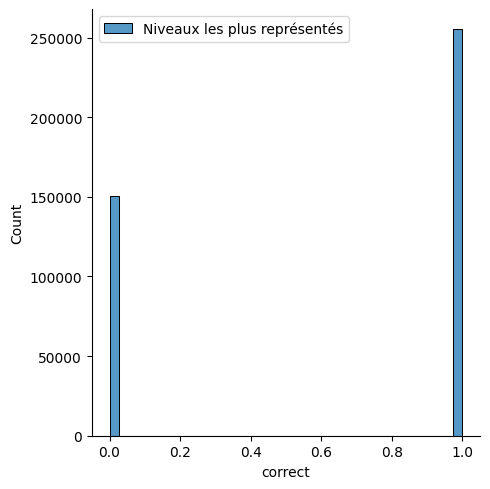

In [234]:
for col in zero_na:
    plt.figure()
    for cat in df['statut'].unique():
        sns.displot(df[df['statut']== cat][col], label=cat)
    plt.legend()

### Analyse un  peu plus détaillée des NanS


 






Juste titre informatif Que se passerait-il si on éliminait certaines valeurs manquantes  dans notre dataset ? 


Actuellement on a deux types de variables : 


- Little_na
- Medium_na

Idéalement on aimerait avoir les deux 

Le problème visuellement en analysant les données manquantes on se rend compte que 

nos lignes ne sont pas alignés entre ces deux catégories de variables 

la réunion entre ces deux catégories de variables va éliminer énormément de valeurs dans notre dataset


Sur les 600000 valeurs qu'on avaient ils nous resteraient 194334 valeurs (KO)


Une question qui se pose aussi   quel serait l'état de notre target si on éliminait les nas de certaines catégories d'un coup  ? . 

Une bonne stratégie serait de conserver ces valeurs manquantes et de les remplacer par la méthode fillna dans la section preprocessing



 little_na 543318(64/35) , Medium_na  208428 (63/36)   


<Axes: >

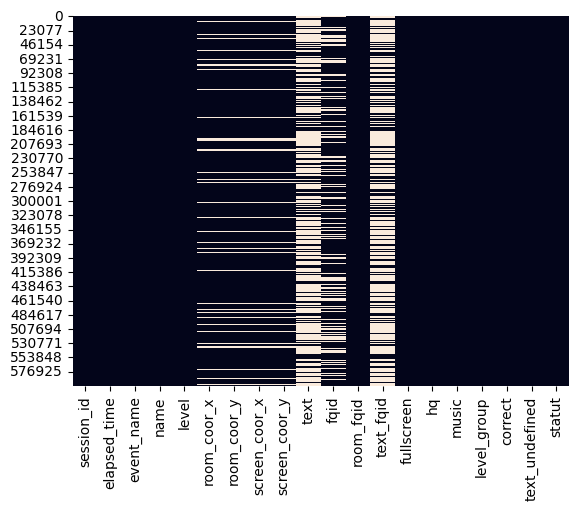

In [237]:
sns.heatmap(df.isna() , cbar=False)

In [238]:
df.dropna().count()

session_id        194334
elapsed_time      194334
event_name        194334
name              194334
level             194334
room_coor_x       194334
room_coor_y       194334
screen_coor_x     194334
screen_coor_y     194334
text              194334
fqid              194334
room_fqid         194334
text_fqid         194334
fullscreen        194334
hq                194334
music             194334
level_group       194334
correct           194334
text_undefined    194334
statut            194334
dtype: int64

In [239]:
df.count()

session_id        600000
elapsed_time      600000
event_name        600000
name              600000
level             600000
room_coor_x       543318
room_coor_y       543318
screen_coor_x     543318
screen_coor_y     543318
text              208428
fqid              410298
room_fqid         600000
text_fqid         208428
fullscreen        600000
hq                600000
music             600000
level_group       600000
correct           600000
text_undefined    600000
statut            600000
dtype: int64

In [240]:
df[little_na].count() # Combien de valeurs on auraisi on ne conservai que les colonnes little_na

room_coor_x      543318
room_coor_y      543318
screen_coor_x    543318
screen_coor_y    543318
fqid             410298
dtype: int64

In [241]:
df[medium_na].count() #  Combien de valeurs on aurait si on ne conservait que les colonnes medium_na 

text         208428
text_fqid    208428
dtype: int64

In [244]:
df1 = df[little_na]
df1['target'] = df['correct']

df1.dropna()['target'].value_counts(normalize=True)

/var/folders/20/j5yjkwj15ts7__y_rbh9222h0000gn/T/ipykernel_41739/1885918612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['target'] = df['correct']


target
1    0.644122
0    0.355878
Name: proportion, dtype: float64

In [246]:
df2 = df[medium_na]
df2['target'] = df['correct']

df2.dropna()['target'].value_counts(normalize=True)

/var/folders/20/j5yjkwj15ts7__y_rbh9222h0000gn/T/ipykernel_41739/444275743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['target'] = df['correct']


target
1    0.635163
0    0.364837
Name: proportion, dtype: float64

## T-Test

In [249]:
from scipy.stats import ttest_ind

In [248]:
reussite_df.shape

(381098, 18)

In [250]:
echec_df.shape

(218902, 18)

In [251]:
echec_df.sample(1058)

session_id  elapsed_time      event_name       name  level   
525182  20090320140443148       2225186  navigate_click  undefined     15  \
370087  20090317111400710       2804089    object_click      basic      7   
33084   20090312433251036       2227724  navigate_click  undefined     17   
228164  20090315085850788       1650355  navigate_click  undefined     15   
296266  20090316152177500        613650  navigate_click  undefined      6   
...                   ...           ...             ...        ...    ...   
594192  20100007011166932        680743    person_click      basic      9   
48762   20090312433251036       3764935       map_click  undefined     22   
535505  20090320140443148       2948385  navigate_click  undefined     21   
273270  20090315270479452         16123    object_click      basic      0   
411520  20090318021527530        747209    person_click      basic     11   

        room_coor_x  room_coor_y  screen_coor_x  screen_coor_y   
525182   602.400508   -83.586527          834.0          386.0  \
370087   393.239764   -10.000000          751.0          340.0   
33084   -105.442975   -40.625732          552.0          344.0   
228164 -1526.297074  -115.577270          147.0          689.0   
296266    61.812614  -187.610346          544.0          470.0   
...             ...          ...            ...            ...   
594192   -37.334394  -140.000000          354.0          470.0   
48762    476.887585     5.834737          453.0          326.0   
535505   466.187547   164.000000          613.0          166.0   
273270  -585.180733  -345.624511          443.0          621.0   
411520    -5.348501   105.000000          403.0          225.0   

                                                    text   
525182                                              None  \
370087                                              None   
33084                                               None   
228164                                              None   
296266                                              None   
...                                                  ...   
594192  Hmmm... not sure. Why don't you try the library?   
48762                                               None   
535505                                              None   
273270                                              None   
411520                 Wait a sec. Women couldn't vote?!   

                             fqid                                room_fqid   
525182                       None  tunic.historicalsociety.collection_flag  \
370087  businesscards.card_1.next             tunic.humanecology.frontdesk   
33084                        None            tunic.historicalsociety.entry   
228164                       None             tunic.historicalsociety.cage   
296266              trigger_scarf     tunic.historicalsociety.closet_dirty   
...                           ...                                      ...   
594192                     worker               tunic.drycleaner.frontdesk   
48762             tunic.capitol_2            tunic.historicalsociety.entry   
535505                       None              tunic.kohlcenter.halloffame   
273270                   notebook           tunic.historicalsociety.closet   
411520                  archivist        tunic.historicalsociety.frontdesk   

                                                text_fqid  fullscreen  hq   
525182                                               None           0   0  \
370087                                               None           0   0   
33084                                                None           0   0   
228164                                               None           1   0   
296266                                               None           0   0   
...                                                   ...         ...  ..   
594192             tunic.drycleaner.frontdesk.worker.done           0   0   
48762                  

In [253]:
balanced_reu = reussite_df.sample(echec_df.shape[0])

In [254]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_reu[col].dropna() , echec_df[col].dropna())
    if p < alpha:
        return 'H0 Rejettée'
    else :
        return 0

In [256]:
for col in little_na:
    print(f'{col :-<50} {t_test(col)}')

room_coor_x--------------------------------------- 0
room_coor_y--------------------------------------- 0
screen_coor_x------------------------------------- H0 Rejettée
screen_coor_y------------------------------------- H0 Rejettée


TypeError: unsupported operand type(s) for /: 'str' and 'int'


## Conclusion du test d'hypothèse (test de student)

screen_coor_x------------------------------------- H0 Rejettée
screen_coor_y------------------------------------- H0 Rejettée




Les valeurs des variables screen_coor_x et screen_coor_y  

ne sont pas  significativement différent pour les gens ayant une bonne performance et une mauvaise performance 